In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EDA

In [ ]:
!pip install obonet

In [ ]:
!pip install pygraphviz


In [ ]:
# networkx for graph stuff
import networkx

# to plot subgraphs
from networkx.drawing.nx_agraph import graphviz_layout

# to plot graphs
import matplotlib.pyplot as plt

# use obonet to load the ontology in a networkx graph
import obonet

In [ ]:
go_path = "/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo"

In [ ]:
knowledge_graph = obonet.read_obo(go_path)

In [ ]:
print("Nodes: {}".format(len(knowledge_graph.nodes)))
print("Edges: {}".format(len(knowledge_graph.edges)))

In [ ]:
print("Is DAG: {}".format(networkx.is_directed_acyclic_graph(knowledge_graph)))

In [ ]:
#This code calculates the number of subterms of a given term (GO:0003700) in an infographic and prints it to the screen.
#Bu kod, belirli bir terimin (GO:0003700) bir bilgi grafiği içindeki alt terimlerinin sayısını hesaplar ve ekrana yazdırır.
term = "GO:0003700"
print("Descendants of {}: {}".format(term, len(networkx.descendants(knowledge_graph, term))))

In [ ]:
#This piece of code is used to generate a subgraph that contains a specific term and its sub-terms in an infographic.
#Bu kod parçası, bir bilgi grafiğinde belirli bir terim ve bu terimin alt terimlerini içeren bir alt grafiği elde etmek için kullanılır.
def get_subgraph(graph, term):
    descendants = networkx.descendants(graph, term)
    return networkx.subgraph(graph, [term] + list(descendants))

In [ ]:
knowledge_graph.nodes[term]

In [ ]:
#This piece of code is used to get the labels of the nodes in an infographic.
#Bu kod parçası, bir bilgi grafiğindeki düğümlerin etiketlerini elde etmek için kullanılır.
def get_node_labels(graph):
    labels = {}
    for node in graph.nodes:
        id = node
        namespace = graph.nodes[node].get('name', '')  # Default to empty string if 'name' is not found
        labels[node] = f'{id}\n{namespace}'
    return labels

In [ ]:
#This snippet is used to visualize a subgraph containing a given term and its sub-terms.
#Bu kod parçası, belirli bir terim ve onun alt terimlerini içeren bir alt grafiği görselleştirmek için kullanılır.
def plot_subgraph(graph, term, width=10, height=10):
    sg = get_subgraph(graph, term)
    pos = graphviz_layout(sg, prog='dot')
    labels = get_node_labels(sg)
    plt.figure(figsize=(width, height))
    networkx.draw_networkx(sg, pos, labels=labels, with_labels=True, node_color = 'lightblue', node_size=1000)

In [ ]:
plot_subgraph(knowledge_graph, term, 15, 15)

In [ ]:
#This piece of code aims to create a mapping between GO IDs and names in an infographic.
#Bu kod parçası, bir bilgi grafiği içindeki GO ID'ler ile isimler arasında bir eşleme (mapping) oluşturmayı amaçlar.
id_to_name = {id_: data.get('name') for id_, data in knowledge_graph.nodes(data=True)}
# mapping from name to GO ID
# addan GO ID'ye eşleme
name_to_id = {data['name']: id_ for id_, data in knowledge_graph.nodes(data=True) if 'name' in data}

In [ ]:
#This snippet demonstrates access to a specific GO ID (GO:0006302) and a name ('double-strand break repair') using the id_to_name and name_to_id dictionaries.
#Bu kod parçası, id_to_name ve name_to_id sözlüklerini kullanarak belirli bir GO ID'ye (GO:0006302) ve bir isme ('double-strand break repair') erişimi göstermektedir.
id_to_name["GO:0006302"], name_to_id['double-strand break repair']

In [ ]:
#This snippet demonstrates access to names corresponding to specific GO IDs using the id_to_name dictionary.
#Bu kod parçası, id_to_name sözlüğünü kullanarak belirli GO ID'lerine karşılık gelen isimlere erişimi göstermektedir.
id_to_name['GO:0008150'], id_to_name['GO:0005575'], id_to_name['GO:0003674']

In [ ]:
plot_subgraph(knowledge_graph, 'GO:0003899', 15, 15)

In [ ]:
reversed_graph = knowledge_graph.reverse(copy=True)
# plot the ancestors of GO:0003899
plot_subgraph(reversed_graph, 'GO:0003899', 30, 30)

In [ ]:
#This snippet creates a list named annotations. This list contains specific GO IDs. Related GO IDs are concepts that represent gene functions or biological processes.
#Bu kod parçası, annotations adlı bir liste oluşturur. Bu liste, belirli GO ID'lerini içerir. İlgili GO ID'ler, gen fonksiyonlarını veya biyolojik süreçleri temsil eden kavramlardır.
annotations = [
"GO:0009274",
"GO:0000724",
"GO:0009314",
"GO:0009432",
"GO:0005524",
"GO:0006281",
"GO:0006310",
"GO:0005524",
"GO:0006281",
"GO:0006974",
"GO:0000166"
]

In [ ]:
#This snippet aims to print the corresponding GO ID in the id_to_name dictionary for each GO ID in the annotations list.
#Bu kod parçası, annotations listesindeki her bir GO ID için, ilgili GO ID'nin id_to_name sözlüğündeki karşılığını yazdırmayı amaçlar.
for annotation in annotations:
    print(annotation, id_to_name[annotation])

In [ ]:
#This snippet plots the corresponding subgraph using the plot_subgraph function for each GO ID in the annotations list.
#Bu kod parçası, annotations listesindeki her bir GO ID için plot_subgraph fonksiyonunu kullanarak ilgili alt grafiği çizer.
for annotation in annotations:
    plot_subgraph(knowledge_graph, annotation, 25, 25)

In [ ]:
from Bio import SeqIO
import plotly.graph_objects as go
from collections import Counter

In [ ]:
train_fasta = '/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta'
test_fasta = '/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

In [ ]:
#This piece of code is used to read DNA/RNA/protein sequences (in 'fasta' format) from a training dataset and a test dataset file.
#Bu kod parçası, bir eğitim veri seti ve bir test veri seti dosyasındaki DNA/RNA/protein dizilerini ('fasta' formatında) okumak için kullanılır.
train_sequences = SeqIO.parse(train_fasta, 'fasta')
test_sequences = SeqIO.parse(test_fasta, 'fasta')

In [ ]:
#This piece of code reads DNA/RNA/protein sequences (in 'fasta' format) from training and testing dataset files to generate NumPy sequences containing sequence IDs and sequences themselves.
#Bu kod parçası, eğitim ve test veri seti dosyalarındaki DNA/RNA/protein dizilerini ('fasta' formatında) okuyarak dizi kimlikleri ve dizilerin kendilerini içeren NumPy dizileri oluşturur.
train_ids = np.array([seq.id for seq in SeqIO.parse(train_fasta, 'fasta')], dtype=object)
train_sequences = np.array([seq.seq for seq in SeqIO.parse(train_fasta, 'fasta')], dtype=object)
test_ids = np.array([seq.id for seq in SeqIO.parse(test_fasta, 'fasta')], dtype=object)
test_sequences = np.array([seq.seq for seq in SeqIO.parse(test_fasta, 'fasta')], dtype=object)

In [ ]:
print('Train fasta file:')
print('Number of ids: ', len(train_ids))
print('Number of sequences: ', len(train_sequences))
print('Number of unique ids: ', len(np.unique(train_ids)))
print('Number of unique sequences: ', len(np.unique(train_sequences)))
print('Test fasta file:')
print('Number of ids: ', len(test_ids))
print('Number of sequences: ', len(test_sequences))
print('Number of unique ids: ', len(np.unique(test_ids)))
print('Number of unique sequences: ', len(np.unique(test_sequences)))

In [ ]:
#This piece of code aims to find unique (non-repeating) sequence instances in training and test datasets and return the size of these unique instances.
#Bu kod parçası, eğitim ve test veri setlerindeki benzersiz (tekrarlanmayan) dizi örneklerini bulmayı ve bu benzersiz örneklerin boyutunu döndürmeyi amaçlar.
unique_train_sequences = np.unique(train_sequences)
unique_test_sequences = np.unique(test_sequences)
unique_train_sequences.shape, unique_test_sequences.shape

In [ ]:
#This piece of code creates and plots a histogram to visualize the distribution of the lengths of the sequences in the training and test datasets.
#Bu kod parçası, eğitim ve test veri setlerindeki dizilerin uzunluklarının dağılımını görselleştirmek için bir histogram oluşturur ve çizer.
fig = go.Figure()
fig.add_trace(go.Histogram(x=[len(seq) for seq in train_sequences], name='Train', opacity=0.5))
fig.add_trace(go.Histogram(x=[len(seq) for seq in test_sequences], name='Test', opacity=0.5))
fig.update_layout(title='Distribution of sequence lengths in train and test fasta files / Dizi uzunluklarının tren ve test fasta dosyalarındaki dağılımı',
                    xaxis_title='Sequence length / dizi uzunluğu',
                    yaxis_title='Count',
                    bargap=0.2,
                    bargroupgap=0.1)
fig.show()

In [ ]:
#This piece of code creates and plots a histogram to visualize the distribution of the lengths of the sequences in the training and test datasets. It also uses the xaxis_range parameters to constrain the x-range range.
#Bu kod parçası, eğitim ve test veri setlerindeki dizilerin uzunluklarının dağılımını görselleştirmek için bir histogram oluşturur ve çizer. Ayrıca, x ekseni aralığını sınırlamak için xaxis_range parametresi kullanır.
fig = go.Figure()
fig.add_trace(go.Histogram(x=[len(seq) for seq in train_sequences], name='Train', opacity=0.5))
fig.add_trace(go.Histogram(x=[len(seq) for seq in test_sequences], name='Test', opacity=0.5))
fig.update_layout(title='Distribution of sequence lengths in train and test fasta files / Dizi uzunluklarının tren ve test fasta dosyalarındaki dağılımı',
                    xaxis_title='Sequence length / dizi uzunluğu',
                    yaxis_title='Count',
                    bargap=0.2,
                    bargroupgap=0.1,
                    xaxis_range=[0, np.percentile([len(seq) for seq in train_sequences], 95)])
fig.show()


In [ ]:
#This snippet creates a NumPy array by converting arrays from the training and test datasets to the str data type.
#Bu kod parçası, eğitim ve test veri setlerindeki dizileri str veri türüne dönüştürerek bir NumPy dizisi oluşturur.
train_sequences = np.array([str(seq) for seq in train_sequences], dtype=object)
test_sequences = np.array([str(seq) for seq in test_sequences], dtype=object)

In [ ]:
#This piece of code uses the Counter class to calculate the number of amino acids in sequences in the training and test datasets.
#Bu kod parçası, eğitim ve test veri setlerindeki dizilerdeki amino asitlerin sayısını hesaplamak için Counter sınıfını kullanır.
train_aa_counts = Counter(''.join(train_sequences))
test_aa_counts = Counter(''.join(test_sequences))

In [ ]:
#This code snippet rearranges the amino acid numbers in the training and test datasets in order from highest to lowest.
#Bu kod parçası, eğitim ve test veri setlerindeki amino asit sayılarını, en yüksek sayıdan en düşüğe doğru sıralayarak yeniden düzenler.
train_aa_counts = {k: v for k, v in sorted(train_aa_counts.items(), key=lambda item: item[1], reverse=True)}
test_aa_counts = {k: v for k, v in sorted(test_aa_counts.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
#This piece of code creates and plots a bar chart by logging amino acid numbers in the training and test datasets.
#Bu kod parçası, eğitim ve test veri setlerindeki amino asit sayılarını günlüğe kaydederek bir çubuk grafik oluşturur ve çizer.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(train_aa_counts.keys()), y=np.log(list(train_aa_counts.values())), name='Train', opacity=0.5))
fig.add_trace(go.Bar(x=list(test_aa_counts.keys()), y=np.log(list(test_aa_counts.values())), name='Test', opacity=0.5))
fig.update_layout(title='Log counts of amino acids in train and test fasta files / Train ve test fasta dosyalarındaki amino asit sayımlarını günlüğe kaydedin',
                    xaxis_title='Amino acid',
                    yaxis_title='Log count',
                    bargap=0.2,
                    bargroupgap=0.1)
fig.show()

In [ ]:
print('Amino acids in train fasta file: ', train_aa_counts.keys())
# number of amino acids
print('Number of amino acids in train fasta file: ', len(train_aa_counts.keys()))

In [ ]:
#The code you provided defines a dictionary called amino_acid_dict that maps single-letter amino acid codes to their corresponding full names. It allows you to easily retrieve the full name of an amino acid by using its single-letter code as a key.
#Sağladığınız kod, tek harfli amino asit kodlarını karşılık gelen tam adlarıyla eşleyen amino_acid_dict adlı bir sözlüğü tanımlar. Tek harfli kodunu anahtar olarak kullanarak bir amino asidin tam adını kolayca almanızı sağlar.
amino_acid_dict = {
    'A': 'Alanine',
    'R': 'Arginine',
    'N': 'Asparagine',
    'D': 'Aspartic Acid',
    'C': 'Cysteine',
    'E': 'Glutamic Acid',
    'Q': 'Glutamine',
    'G': 'Glycine',
    'H': 'Histidine',
    'I': 'Isoleucine',
    'L': 'Leucine',
    'K': 'Lysine',
    'M': 'Methionine',
    'F': 'Phenylalanine',
    'P': 'Proline',
    'S': 'Serine',
    'T': 'Threonine',
    'W': 'Tryptophan',
    'Y': 'Tyrosine',
    'V': 'Valine',
    'X': 'Any/Unknown',
    'O': 'Pyrrolysine',
    'U': 'Selenocysteine',
    'B': 'Asparagine or Aspartic Acid',
    'Z': 'Glutamine or Glutamic Acid',
}

In [ ]:
#The code you provided uses the go module from the plotly library to create a bar chart using the Figure class. The chart compares the log counts of amino acids in the train and test fasta files.
#Sağladığınız kod, Figure sınıfını kullanarak bir çubuk grafik oluşturmak için plotly kitaplığından go modülünü kullanır. Tablo, trende ve test fasta dosyalarındaki amino asitlerin günlük sayılarını karşılaştırır.
fig = go.Figure()
fig.add_trace(go.Bar(x=[amino_acid_dict[aa] for aa in train_aa_counts.keys()], y=np.log(list(train_aa_counts.values())), name='Train', opacity=0.5))
fig.add_trace(go.Bar(x=[amino_acid_dict[aa] for aa in test_aa_counts.keys()], y=np.log(list(test_aa_counts.values())), name='Test', opacity=0.5))
fig.update_layout(title='Log counts of amino acids in train and test fasta files / Train ve test fasta dosyalarındaki amino asit sayımlarını günlüğe kaydedin',
                    xaxis_title='Amino acid',
                    yaxis_title='Log count',
                    bargap=0.2,
                    bargroupgap=0.1)
fig.show()

In [ ]:
!pip install pandas_profiling

In [ ]:
import os
import gc
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import AUC
from pandas_profiling import ProfileReport

tqdm.pandas()

In [ ]:
testsuperset = pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv', sep='\t', encoding='latin-1')
train_terms= pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv', sep='\t', encoding='latin-1')
train_taxonomy=pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_taxonomy.tsv', sep='\t', encoding='latin-1')

In [ ]:
testsuperset_profile = ProfileReport(testsuperset, title="testsuperset")
testsuperset_profile.to_notebook_iframe()

In [ ]:
train_terms_profile = ProfileReport(train_terms, title="train_terms")
train_terms_profile.to_notebook_iframe()

In [ ]:
train_taxonomy_profile = ProfileReport(train_taxonomy, title="train_taxonomy")
train_taxonomy_profile.to_notebook_iframe()

In [ ]:
DATA_DIR = '/kaggle/input/cafa-5-protein-function-prediction'
MAX_LABELS = 500

### This code defines variables that contain some important information such as the data path and the maximum label count.
### Bu kod, veri yolu ve maksimum etiket sayısı gibi bazı önemli bilgileri içeren değişkenleri tanımlar.

In [ ]:
train_terms = pd.read_csv(os.path.join(DATA_DIR, 'Train', 'train_terms.tsv'), sep='\t')

In [ ]:
terms = train_terms.groupby(['aspect', 'term'])['term'].count().reset_index(name='frequency')
print(terms.groupby('aspect')['term'].nunique())

### This code calculates the frequency of terms grouped by aspects in a given DataFrame and then provides the number of unique terms for each aspect.
### Bu kod, belirli bir DataFrame'de yönlere göre gruplandırılmış terimlerin sıklığını hesaplar ve ardından her bir özellik için benzersiz terimlerin sayısını sağlar.

In [ ]:
fractions = (terms.groupby('aspect')['term'].nunique() / terms['term'].nunique() * MAX_LABELS).apply(round)
print(fractions)

### This code calculates the fractions of unique terms for each aspect by dividing the number of unique terms for each aspect by the total number of unique terms in the DataFrame. Then, it multiplies the result by the maximum number of labels (MAX_LABELS) and rounds the values to the nearest integer.
### Bu kod, her özellik için benzersiz terimlerin sayısını DataFrame'deki benzersiz terimlerin toplam sayısına bölerek her bir özellik için benzersiz terimlerin kesirlerini hesaplar. Ardından, sonucu maksimum etiket sayısıyla (MAX_LABELS) çarpar ve değerleri en yakın tamsayıya yuvarlar.

In [ ]:
selected_terms = set()
for aspect, number in fractions.items():
    selection = terms.loc[(terms.aspect == aspect)]
    selection = selection.nlargest(number, columns='frequency', keep='first')
    selected_terms.update(selection.term.to_list())

### This code initializes an empty set called selected_terms. It then iterates over the fractions dictionary, which contains aspects as keys and corresponding fractions as values. For each aspect and its corresponding fraction, the code selects rows from the terms DataFrame where the aspect matches. It then selects the top number rows with the highest frequency based on the 'frequency' column and keeps only the first occurrence if there are ties. The terms from this selection are added to the selected_terms set.
### Bu kod, selected_terms adlı boş bir kümeyi başlatır. Ardından, açıları anahtarlar olarak ve karşılık gelen kesirleri değerler olarak içeren kesirler sözlüğünü yineler. Her özellik ve ona karşılık gelen kesir için kod, yönün eşleştiği DataFrame terimlerinden satırları seçer. Daha sonra 'frekans' sütununa göre en yüksek frekansa sahip en üst sıradaki satırları seçer ve bağlar varsa yalnızca ilk geçtiği yeri tutar. Bu seçimdeki terimler, seçili_terimler kümesine eklenir.

In [ ]:
print(selected_terms)

In [ ]:
def assign_labels(annotations, selected_terms=selected_terms):
    
    intersection = selected_terms.intersection(annotations)
    labels = np.isin(np.array(list(selected_terms)), np.array(list(intersection)))
    
    return list(labels.astype('int'))



#### This code defines a function named assign_labels that takes an input array called annotations and an optional argument selected_terms.

#### The function performs the following tasks:

1. It finds the intersection between the selected_terms set and the annotations array and stores it in a variable called intersection.
2. It converts the selected_terms set into an array and the intersection set into an array.
3. It checks which elements in the selected_terms array are also present in the intersection array and returns a list of boolean values indicating the presence of each term.
4. Finally, it converts the boolean values to integers and returns the resulting list of labels.

#### Bu kod, ek açıklamalar adı verilen bir giriş dizisini ve isteğe bağlı bir argümanı Selected_terms alan, assign_labels adlı bir işlevi tanımlar.

#### İşlev aşağıdaki görevleri gerçekleştirir:

1. Selected_terms kümesi ile annotations dizisi arasındaki kesişimi bulur ve onu kesişim adı verilen bir değişkende saklar.
2. Selected_terms setini bir diziye ve kesişme setini bir diziye dönüştürür.
3. Selected_terms dizisindeki hangi öğelerin kesişim dizisinde de bulunduğunu kontrol eder ve her terimin varlığını gösteren bir boole değerleri listesi döndürür.
4. Son olarak, boolean değerleri tamsayılara dönüştürür ve sonuçta ortaya çıkan etiket listesini döndürür.

In [ ]:
annotations = train_terms.groupby('EntryID')['term'].apply(set)
labels = annotations.progress_apply(assign_labels)

labels.head()

### This code calculates labels by grouping a dataframe and returns a preview of the calculated labels.
### Bu kod, bir veri çerçevesini gruplandırarak etiketleri hesaplar ve hesaplanan etiketlerin bir önizlemesini döndürür.

In [ ]:
train_ids = np.load('/kaggle/input/t5embeds/train_ids.npy')

x_train = np.load('/kaggle/input/t5embeds/train_embeds.npy')

In [ ]:
y_train = np.array(labels[train_ids].to_list())

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, shuffle=True, random_state=42)

In [ ]:

# build a simple MLP model in Keras with ReLU activation and nothing else
nfeats = x_train.shape[1]
nlabels = y_train.shape[1]
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=nfeats))
model.add(Dense(128, activation='relu'))
model.add(Dense(nlabels, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[AUC()])


This code builds and compiles a simple MLP (Multi-Layer Perceptron) model using Keras. I can briefly explain their functions:

1. **nfeats** = x_train.shape[1]: This expression assigns the feature in the training dataset to a variable that determines the give and runs as nfeats.

2. **nlabels** = y_train.shape[1]: This expression determines the labeling in the training dataset and assigns it to a Variable variable as nlabels.

3. **model** = Sequential(): This statement creates a sequential Keras model.

4. **model.add(Dense(256, activation='relu', input_dim=nfeats))**: This expression defines a layer of the model. This layer contains 256 neurons, uses the ReLU activation function, and the input size is set in nfeats.

5. **model.add(Dense(128, activation='relu'))**: This expression layers another layer. This layer contains 128 neurons, uses the ReLU activation function.

6. **model.add(Dense(nlabels, activation='sigmoid'))**: This expression defines the boundaries of an output layer. This layer contains nlabels neurons and uses the sigmoid activation function.

7. **model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC()])**: This expression is the missing values ​​of the model, determining the optimizer and metrics. Binary_crossentropy is used as loss function, man as optimizer and AUC (Curve Under Area) as measurement.

This code defines a simple MLP model with ReLU activation and settings for loss function, optimizer and metrics for training.


Bu kod, Keras kullanarak basit bir MLP (Çok Katmanlı Algılayıcı) modeli oluşturur ve derler. İşlevlerini kısaca açıklayabilirim:

1. **nfeats** = x_train.shape[1]: Bu ifade, eğitim veri setindeki özellik sayısını belirler ve nfeats olarak adlandırılan bir değişkene atar.

2. **nlabels** = y_train.shape[1]: Bu ifade, eğitim veri setindeki etiket sayısını belirler ve nlabels olarak adlandırılan bir değişkene atar.

3. **model** = Sequential(): Bu ifade, ardışık bir Keras modeli oluşturur.

4. **model.add(Dense(256, activation='relu', input_dim=nfeats))**: Bu ifade, modelin bir katmanını tanımlar. Bu katman, 256 nöron içerir, ReLU aktivasyon fonksiyonu kullanır ve giriş boyutu nfeats olarak belirlenir.

5. **model.add(Dense(128, activation='relu'))**: Bu ifade, bir başka katmanı tanımlar. Bu katman, 128 nöron içerir, ReLU aktivasyon fonksiyonu kullanır.

6. **model.add(Dense(nlabels, activation='sigmoid'))**: Bu ifade, bir çıkış katmanını tanımlar. Bu katman, nlabels sayısında nöron içerir ve sigmoid aktivasyon fonksiyonu kullanır.

7. **model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC()])**: Bu ifade, modelin kayıp fonksiyonunu, optimize ediciyi ve ölçümleri belirler. Kayıp fonksiyonu olarak binary_crossentropy, optimize edici olarak adam ve ölçüm olarak AUC (Alan Altındaki Eğri) kullanılır.

Bu kod, ReLU aktivasyonlu basit bir MLP modeli tanımlar ve eğitim için kayıp fonksiyonu, optimize edici ve ölçümleri ayarlar.

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_valid, y_valid))

In [ ]:
y_hat = model.predict(x_valid)

scores = pd.DataFrame(columns=list(selected_terms), index=['roc_auc'])

In [ ]:
for i, term in enumerate(selected_terms):
    score = roc_auc_score(y_valid[:, i], y_hat[:, i])
    scores[term] = score

scores.mean(axis=1)

This code calculates ROC AUC (Receiver Operating Characteristics) scores for selected terms. I can briefly explain their functions:

1. **for i, term in enumerate(selected_terms)**: This loop retrieves an index (i) and term (term) pair for each term in the selected_terms array.
 
2. **score = roc_auc_score(y_valid[:, i], y_hat[:, i])**: This expression calculates the ROC AUC score. The expression y_valid[:, i] selects only the column of the tags in the y_valid array that contains the term with index i. The expression y_hat[:, i] selects the column of the predicted labels that contains only the term indexed i. With these selections, the ROC AUC score is calculated and assigned to the score variable.
 
3. **scores[term] = score**: This expression adds the calculated ROC AUC score to a dictionary named scores as the key corresponding to the term term.
 
4. **scores.mean(axis=1)**: This expression calculates the average value of all ROC AUC scores in the scores dictionary and returns an average value for each term.

This code calculates the ROC AUC scores for the selected terms and returns their average value.

Bu kod, seçilen terimler için ROC AUC (Alıcının İşletim Karakteristiği) puanlarını hesaplar. İşlevlerini kısaca açıklayabilirim:

1. **for i, term in enumerate(selected_terms)**: Bu döngü, selected_terms dizisindeki her terim için bir indeks (i) ve terim (term) çiftini alır.
 
2. **score = roc_auc_score(y_valid[:, i], y_hat[:, i])**: Bu ifade, ROC AUC puanını hesaplar. y_valid[:, i] ifadesi, y_valid dizisindeki etiketlerin sadece i indeksli terimi içeren sütununu seçer. y_hat[:, i] ifadesi ise, tahmin edilen etiketlerin sadece i indeksli terimi içeren sütununu seçer. Bu seçimlerle ROC AUC puanı hesaplanır ve score değişkenine atanır.
 
3. **scores[term] = score**: Bu ifade, hesaplanan ROC AUC puanını scores adlı bir sözlüğe term terimine karşılık gelen anahtar olarak ekler.
 
4. **scores.mean(axis=1)**: Bu ifade, scores sözlüğündeki tüm ROC AUC puanlarının ortalama değerini hesaplar ve her terim için bir ortalama değeri döndürür.

Bu kod, seçilen terimler için ROC AUC puanlarını hesaplar ve ortalama değerlerini döndürür.

In [ ]:
test_ids = np.load('/kaggle/input/t5embeds/test_ids.npy')
x_test = np.load('/kaggle/input/t5embeds/test_embeds.npy')

In [ ]:
del x_train, y_train, x_valid, y_valid, labels
gc.collect()

In [ ]:
predictions = model.predict(x_test)
del x_test
gc.collect()

In [ ]:
chunk_size = 5_000
chunks = [range(i, min(i + chunk_size, len(predictions))) for i in range(0, len(predictions), chunk_size)]

final_sub = pd.DataFrame()  # Create an empty DataFrame to hold the final result

print(f"processing {len(chunks)} chunks of {chunk_size} predictions each")

This code performs a series of operations and processes the results. I can briefly explain their functions:

1. **chunk_size = 5_000**: This expression assigns a number value to a variable called chunk_size. This determines the size of each piece.

2. **chunks = [range(i, min(i + chunk_size, len(predictions))) for i in range(0, len(predictions), chunk_size)]**: This expression loops through the array of predictions creates. Each chunk contains indices between i and i + chunk_size which is smaller than chunk_size.
 
3. **final_sub = pd.DataFrame()**: This statement creates final_sub, an empty DataFrame to hold the result.

4. **print(f"processing {len(chunks)} chunks of {chunk_size} predictions each")**: This expression prints how many chunks are in the process and the size of each chunk.

This code performs the segmentation operations by doing a series of operations and creates a DataFrame to store the result. It also displays the number and size of parts during the process.

Bu kod, bir dizi işlem gerçekleştirir ve sonuçları işler. İşlevlerini kısaca açıklayabilirim:

1. **chunk_size = 5_000**: Bu ifade, bir sayı değerini chunk_size olarak adlandırılan bir değişkene atar. Bu, her bir parçanın boyutunu belirler.

2. **chunks = [range(i, min(i + chunk_size, len(predictions))) for i in range(0, len(predictions), chunk_size)]**: Bu ifade, predictions dizisi üzerinde döngü oluşturarak parçaları oluşturur. Her bir parça, chunk_size'dan küçük olan i ve i + chunk_size arasındaki indeksleri içerir.
 
3. **final_sub = pd.DataFrame()**: Bu ifade, sonucu tutmak için boş bir DataFrame olan final_sub'ı oluşturur.

4. **print(f"processing {len(chunks)} chunks of {chunk_size} predictions each")**: Bu ifade, işlem sırasında kaç parçanın olduğunu ve her bir parçanın boyutunu yazdırır.

Bu kod, bir dizi işlem yaparak parçalara ayırma işlemlerini gerçekleştirir ve sonucu saklamak için bir DataFrame oluşturur. Ayrıca, işlem sırasında parçaların sayısını ve boyutunu görüntüler.

In [ ]:
for chunk in chunks:
    print(f"processing chunk {chunk}")
    sub = pd.DataFrame(data=predictions[chunk], columns=list(selected_terms), index=test_ids[chunk])
    sub = sub.T.unstack().reset_index(name='prediction')
    sub = sub.loc[sub['prediction'] > 0]
    final_sub = pd.concat([final_sub, sub])  # Concatenate current chunk DataFrame to the final DataFrame

final_sub.head()

In [ ]:
final_sub.to_csv('submission.tsv', sep='\t', index=False, header=False)

This code processes the results by performing operations on the fragments. I can briefly explain their functions:

1. **for chunk in chunks**: This cycle is repeated for each chunk in the chunks list.

2. **print(f"processing chunk {chunk}")**: This expression prints the index of the processed chunk.

3. **sub = pd.DataFrame(data=predictions[chunk], columns=list(selected_terms), index=test_ids[chunk])**: This expression takes the data from the predictions array based on the fragment indices, the selected_terms list as column names Creates a DataFrame using and using the test_ids array as index.

4. **sub = sub.T.unstack().reset_index(name='prediction')**: This expression returns a DataFrame by transforming the DataFrame, sorting the columns and with a new column name named 'prediction'.

5. **sub = sub.loc[sub['prediction'] > 0]**: This expression selects rows greater than 0 in the 'prediction' column.

6. **final_sub = pd.concat([final_sub, sub])**: This statement merges the current fragment DataFrame with the last DataFrame and updates the final_sub variable.

7. **final_sub.head()**: This statement displays the first few rows of the updated final_sub DataFrame.

This code loops over pieces of data and combines the results to create a DataFrame.

Bu kod, parçalar üzerinde işlemler gerçekleştirerek sonuçları işler. İşlevlerini kısaca açıklayabilirim:

1. **for chunk in chunks**: Bu döngü, chunks listesindeki her bir parça için tekrarlanır.

2. **print(f"processing chunk {chunk}")**: Bu ifade, işlenen parçanın indeksini yazdırır.

3. **sub = pd.DataFrame(data=predictions[chunk], columns=list(selected_terms), index=test_ids[chunk])**: Bu ifade, parça indekslerine dayanarak predictions dizisinden verileri alarak, selected_terms listesini sütun adları olarak kullanarak ve test_ids dizisini indeks olarak kullanarak bir DataFrame oluşturur.

4. **sub = sub.T.unstack().reset_index(name='prediction')**: Bu ifade, DataFrame'i dönüştürerek, sütunları sıralayarak ve 'prediction' adında yeni bir sütun adıyla birlikte bir DataFrame döndürür.

5. **sub = sub.loc[sub['prediction'] > 0]**: Bu ifade, 'prediction' sütununda 0'dan büyük olan satırları seçer.

6. **final_sub = pd.concat([final_sub, sub])**: Bu ifade, mevcut parça DataFrame'ini son DataFrame ile birleştirir ve final_sub değişkenini günceller.

7. **final_sub.head()**: Bu ifade, güncellenen final_sub DataFrame'inin ilk birkaç satırını görüntüler.

Bu kod, veri parçaları üzerinde döngü ile işlemler gerçekleştirir ve sonuçları birleştirerek bir DataFrame oluşturur.

#### This code downloads and installs the NCBI BLAST and ProFun library by running a series of commands. Its functions are as follows:

- !wget https://ftp.ncbi.nlm.nih.gov/blast/executables/LATEST/ncbi-blast-2.14.0+-x64-linux.tar.gz: Downloads the latest version of NCBI BLAST.
- !tar zxvpf ncbi-blast-2.14.0+-x64-linux.tar.gz: Opens the downloaded tar.gz file.
- !cp /kaggle/working/ncbi-blast-2.14.0+/bin/* /opt/conda/bin: Copies BLAST programs to /opt/conda/bin.
- !pip install git+https://github.com/SamusRam/ProFun.git: Installs ProFun library using source code from GitHub.

#### This code downloads the latest version of NCBI BLAST, unzips and copies the required programs to a suitable location. It also installs the ProFun library. These operations ensure that the necessary software is installed.

#### Bu kod, bir dizi komutu çalıştırarak NCBI BLAST ve ProFun kütüphanesini indirir ve kurar. İşlevleri şu şekildedir:

- !wget https://ftp.ncbi.nlm.nih.gov/blast/executables/LATEST/ncbi-blast-2.14.0+-x64-linux.tar.gz: NCBI BLAST'ın en son sürümünü indirir.
- !tar zxvpf ncbi-blast-2.14.0+-x64-linux.tar.gz: İndirilen tar.gz dosyasını açar.
- !cp /kaggle/working/ncbi-blast-2.14.0+/bin/* /opt/conda/bin: BLAST programlarını /opt/conda/bin dizinine kopyalar.
- !pip install git+https://github.com/SamusRam/ProFun.git: ProFun kütüphanesini GitHub üzerinden kaynak kodunu kullanarak yükler.

#### Bu kod, NCBI BLAST'ın en son sürümünü indirir, açar ve gerekli programları uygun bir konuma kopyalar. Ayrıca, ProFun kütüphanesini de yükler. Bu işlemler, gerekli yazılımların kurulmasını sağlar.

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/blast/executables/LATEST/ncbi-blast-2.14.0+-x64-linux.tar.gz
!tar zxvpf ncbi-blast-2.14.0+-x64-linux.tar.gz
!cp /kaggle/working/ncbi-blast-2.14.0+/bin/* /opt/conda/bin
!pip install git+https://github.com/SamusRam/ProFun.git

In [ ]:
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm, trange
from Bio import SeqIO
import numpy as np

from profun.models import BlastMatching, BlastConfig
from profun.utils.project_info import ExperimentInfo

#### This code reads the training data from the CAFA-5 protein function prediction dataset and creates a DataFrame. Its functions are as follows:

- **data_root = Path('/kaggle/input/cafa-5-protein-function-prediction'):** Assigns the data root directory to the data_root variable.
- **train_terms = pd.read_csv(data_root/"Train/train_terms.tsv", sep="\t"):** Reads the tsv file containing the training terms and loads it into the train_terms DataFrame.
- ids and seqs lists are created.
- **with open(data_root/"Train/train_sequences.fasta") as handle:** Opens the fasta file containing the training sequences.
- **for record in SeqIO.parse(handle, "fasta"):** Loops each record in the fasta file.
- Adds the record's ID to the list of ids with record.id.
- Adds the string of the record to the seqs list with str(record.seq).
- **train_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs}):** Creates DataFrame created from lists of ids and seqs.
- **train_df_long = train_terms.merge(train_seqs_df, on='EntryID'):** Combines train_terms and train_seqs_df DataFrames on column 'EntryID' and creates train_df_long DataFrame.

#### This code reads the training data from the CAFA-5 protein function prediction dataset and combines the terms and sequences to create a new DataFrame named train_df_long.

#### Bu kod, CAFA-5 protein fonksiyon tahmini veri kümesinden eğitim verilerini okur ve bir DataFrame oluşturur. İşlevleri şu şekildedir:

- **data_root = Path('/kaggle/input/cafa-5-protein-function-prediction'):** Veri kök dizinini data_root değişkenine atar.
- **train_terms = pd.read_csv(data_root/"Train/train_terms.tsv", sep="\t"):** Eğitim terimlerini içeren tsv dosyasını okur ve train_terms DataFrame'ine yükler.
- ids ve seqs listeleri oluşturulur.
- **with open(data_root/"Train/train_sequences.fasta") as handle:** Eğitim dizilerini içeren fasta dosyasını açar.
- **for record in SeqIO.parse(handle, "fasta"):** Fasta dosyasındaki her kaydı döngüyle okur.
	- record.id ile kaydın kimliğini ids listesine ekler.
	- str(record.seq) ile kaydın dizisini seqs listesine ekler.
- **train_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs}):** ids ve seqs listelerinden oluşturulan DataFrame'i oluşturur.
- **train_df_long = train_terms.merge(train_seqs_df, on='EntryID'):** train_terms ve train_seqs_df DataFrame'lerini 'EntryID' sütunu üzerinde birleştirir ve train_df_long DataFrame'ini oluşturur.

#### Bu kod, CAFA-5 protein fonksiyon tahmini veri kümesinden eğitim verilerini okur ve terimlerle dizileri birleştirerek train_df_long adında yeni bir DataFrame oluşturur.

In [ ]:
data_root = Path('/kaggle/input/cafa-5-protein-function-prediction')
train_terms = pd.read_csv(data_root/"Train/train_terms.tsv",sep="\t")

ids = []
seqs = []
with open(data_root/"Train/train_sequences.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        ids.append(record.id)
        seqs.append(str(record.seq))
train_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs})
train_df_long = train_terms.merge(train_seqs_df, on='EntryID')

#### This code sets the configuration information for the BlastMatching model and creates the BlastMatching model. Its functions are as follows:

- **ExperimentInfo(validation_schema='public_lb', model_type='blast', model_version='1nn'):** An object of class ExperimentInfo is created. This object specifies the experiment's validation schema (validation_schema), the model's type (model_type), and the model's version (model_version).
- **BlastConfig(experiment_info=experiment_info, id_col_name='EntryID', target_col_name='term', seq_col_name='Seq', class_names=list(train_df_long['term'].unique()), optimize_hyperparams=Fallets_hypert_opt_n , hyperparam_dimensions=None, per_class_optimization=None, class_weights=None, n_neighbours=5, e_threshold=0.0001, n_jobs=100, pred_batch_size=10):** An object of class BlastConfig is created. This object determines the configuration of the BlastMatching model.
- The parameters are as follows:
- experiment_info: ExperimentInfo object created in the previous step.
- id_col_name: ID column name ('EntryID').
- target_col_name: Target column name ('term').
- seq_col_name: Array column name ('Seq').
- class_names: List of unique terms in the training dataset.
- optimize_hyperparams: Enable/disable hyperparameter optimization (False).
- n_calls_hyperparams_opt: Number of epochs made in hyperparameter optimization (None).
- hyperparam_dimensions: Hyperparameter dimensions (None).
- per_class_optimization: Class based optimization (None).
- class_weights: Class weights (None).
- n_neighbours: Number of neighbors (5).
- e_threshold: Threshold value (0.0001).
- n_jobs: Number of threads (100).
- pred_batch_size: Estimate batch size (10).

#### This code determines the configuration of the BlastMatching model and creates the BlastMatching model. The model makes predictions of protein function based on the specified configuration.

#### Bu kod, BlastMatching modeli için yapılandırma bilgilerini belirler ve BlastMatching modelini oluşturur. İşlevleri şu şekildedir:

- **ExperimentInfo(validation_schema='public_lb', model_type='blast', model_version='1nn'):** ExperimentInfo sınıfından bir nesne oluşturulur. Bu nesne, deneyin doğrulama şemasını (validation_schema), modelin tipini (model_type) ve modelin sürümünü (model_version) belirtir.
- **BlastConfig(experiment_info=experiment_info, id_col_name='EntryID', target_col_name='term', seq_col_name='Seq', class_names=list(train_df_long['term'].unique()), optimize_hyperparams=False, n_calls_hyperparams_opt=None, hyperparam_dimensions=None, per_class_optimization=None, class_weights=None, n_neighbours=5, e_threshold=0.0001, n_jobs=100, pred_batch_size=10):** BlastConfig sınıfından bir nesne oluşturulur. Bu nesne, BlastMatching modelinin yapılandırmasını belirler. 
- Parametreler şu şekildedir:
	- experiment_info: Önceki adımda oluşturulan ExperimentInfo nesnesi.
	- id_col_name: Kimlik sütunu adı ('EntryID').
	- target_col_name: Hedef sütunu adı ('term').
	- seq_col_name: Dizi sütunu adı ('Seq').
	- class_names: Eğitim veri kümesindeki benzersiz terimlerin listesi.
	- optimize_hyperparams: Hiperparametre optimizasyonunu etkinleştirme/kapama (False).
	- n_calls_hyperparams_opt: Hiperparametre optimizasyonunda yapılan çağ sayısı (None).
	- hyperparam_dimensions: Hiperparametre boyutları (None).
	- per_class_optimization: Sınıf bazlı optimizasyon (None).
	- class_weights: Sınıf ağırlıkları (None).
	- n_neighbours: Komşu sayısı (5).
	- e_threshold: Eşik değeri (0.0001).
	- n_jobs: İş parçacığı sayısı (100).
	- pred_batch_size: Tahmin toplu boyutu (10).

#### Bu kod, BlastMatching modelinin yapılandırmasını belirler ve BlastMatching modelini oluşturur. Model, belirtilen yapılandırmaya göre protein fonksiyon tahminlerini yapar.

In [ ]:
experiment_info = ExperimentInfo(validation_schema='public_lb', 
                                 model_type='blast', model_version='1nn')

config = BlastConfig(experiment_info=experiment_info, 
                     id_col_name='EntryID', 
                     target_col_name='term', 
                     seq_col_name='Seq', 
                     class_names=list(train_df_long['term'].unique()), 
                     optimize_hyperparams=False, 
                     n_calls_hyperparams_opt=None,
                    hyperparam_dimensions=None,
                    per_class_optimization=None,
                    class_weights=None,
                    n_neighbours=5,
                    e_threshold=0.0001,
                     n_jobs=100,
                     pred_batch_size=10
                    )

blast_model = BlastMatching(config)

In [ ]:
blast_model.fit(train_df_long)

#### This code reads the protein sequences for the test dataset and makes predictions using the BlastMatching model. Its functions are as follows:

- ID and queue lists are created.
- With **handle open(data_root/"Test (Targets)/testsuperset.fasta")**: Test the protein sequences in the dataset containing the Fasta files.
- To record in **SeqIO.parse(handle, "fasta"): ** Reads each record in the Fasta version loop.
- Adds ids when save with record.id.
- Adds the string of the record with str(record.seq) and the contents of the string.
- **test_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs}):** Creates DataFrame created from ids and seqs lists.
- **test_seqs_df.sample(42).drop_duplicates('EntryID'):** Removes random bodies from the test dataset and duplicate entries in the 'EntryID' column.
- **test_pred_dfblast_model.predict_proba(test_seqs_df.sample(42).drop_duplicates('EntryID'), return_long_df=True): **Makes predictions for the selected files using the BlastMatching model and uses the results to the test_pred_df DataFrame.

#### This code reads the protein sequences for the test dataset, makes predictions based on a random sample and using the BlastMatching model. The prediction stores the results in the test_pred_df DataFrame.

#### Bu kod, test veri kümesi için protein dizilerini okur ve BlastMatching modeli kullanarak tahmin yapar. İşlevleri şu şekildedir:

- ids ve seqs listeleri oluşturulur.
- **with open(data_root/"Test (Targets)/testsuperset.fasta") as handle**: Test veri kümesindeki protein dizilerini içeren fasta dosyasını açar.
- **for record in SeqIO.parse(handle, "fasta"):** Fasta dosyasındaki her kaydı döngüyle okur.
- record.id ile kaydın kimliğini ids listesine ekler.
- str(record.seq) ile kaydın dizisini seqs listesine ekler.
- **test_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs}):** ids ve seqs listelerinden oluşturulan DataFrame'i oluşturur.
- **test_seqs_df.sample(42).drop_duplicates('EntryID'):** Test veri kümesinden rastgele örnekler seçer ve 'EntryID' sütununda yinelenen girdileri kaldırır.
- **test_pred_dfblast_model.predict_proba(test_seqs_df.sample(42).drop_duplicates('EntryID'), return_long_df=True): **Seçilen örnekler için BlastMatching modeli kullanarak tahmin yapar ve sonuçları test_pred_df DataFrame'ine kaydeder.

#### Bu kod, test veri kümesi için protein dizilerini okur, rastgele bir örnek seçer ve BlastMatching modelini kullanarak tahmin yapar. Tahmin sonuçlarını test_pred_df DataFrame'inde saklar.

In [ ]:
ids = []
seqs = []
with open(data_root/"Test (Targets)/testsuperset.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        ids.append(record.id)
        seqs.append(str(record.seq))
test_seqs_df = pd.DataFrame({'EntryID': ids, 'Seq': seqs})
test_pred_df = blast_model.predict_proba(test_seqs_df.sample(42).drop_duplicates('EntryID'), return_long_df=True)

#### This code reads BlastMatching and other protein function prediction results. Its functions are as follows:

- **test_pred_df_blast = pd.read_csv('/kaggle/input/proteinet-best/blast_submission.tsv', sep='\t', header=None).drop(0, axis=1):** reads prediction results from 'blast_submission.tsv' file. Sep='\t' is used to indicate that the file is in tsv format. Set header=None because there is no header line. The first column is removed with drop(0, axis=1) as it is the index column.
- **submission_best_public = pd.read_csv('/kaggle/input/sprof-predictions/submission.tsv', sep='\t', header=None, names=['Id', 'GO term', 'Confidence' ]):** Reads other protein function prediction results from 'submission.tsv' file. Sep='\t' is used to indicate that the file is in tsv format. Set header=None because there is no header line. Column names are specified as 'Id', 'GO term' and 'Confidence'.

#### This code uploads prediction results with BlastMatching model to test_pred_df_blast DataFrame and other protein function prediction results to submission_best_public DataFrame.

#### Bu kod, BlastMatching ve diğer protein fonksiyon tahmin sonuçlarını okur. İşlevleri şu şekildedir:

- **test_pred_df_blast = pd.read_csv('/kaggle/input/proteinet-best/blast_submission.tsv', sep='\t', header=None).drop(0, axis=1):** BlastMatching modeliyle yapılan tahmin sonuçlarını 'blast_submission.tsv' dosyasından okur. Dosya tsv formatında olduğunu belirtmek için sep='\t' kullanılır. Başlık satırı olmadığı için header=None olarak ayarlanır. İlk sütun, indeks sütunu olduğu için drop(0, axis=1) ile kaldırılır.
- **submission_best_public = pd.read_csv('/kaggle/input/sprof-predictions/submission.tsv', sep='\t', header=None, names=['Id', 'GO term', 'Confidence']):** Diğer protein fonksiyon tahmin sonuçlarını 'submission.tsv' dosyasından okur. Dosya tsv formatında olduğunu belirtmek için sep='\t' kullanılır. Başlık satırı olmadığı için header=None olarak ayarlanır. Sütun adları, 'Id', 'GO term' ve 'Confidence' olarak belirtilir.

#### Bu kod, BlastMatching modeliyle yapılan tahmin sonuçlarını test_pred_df_blast DataFrame'ine ve diğer protein fonksiyon tahmin sonuçlarını submission_best_public DataFrame'ine yükler.

In [ ]:
test_pred_df_blast = pd.read_csv('/kaggle/input/proteinet-best/blast_submission.tsv',
    sep='\t', header=None).drop(0, axis=1)

submission_best_public = pd.read_csv('/kaggle/input/sprof-predictions/submission.tsv',
    sep='\t', header=None, names=['Id', 'GO term', 'Confidence'])

#### This code combines BlastMatching and other protein function prediction results and saves the combined results to a file. Its functions are as follows:

- **submissions_merged = submission_best_public.merge(test_pred_df_blast, left_on=['Id', 'GO term'], right_on=[1, 2], how='outer'):** Submission_best_public and test_pred_df_blast DataFrames 'Id' and 'GO term' columns and creates the submissions_merged DataFrame. The merge operation is performed in the form of outer.
- **submissions_merged.drop([1, 2], axis=1, inplace=True):** removes columns 1 and 2 ('Id' and 'GO term') from the submissions_merged DataFrame.
- **submissions_merged['confidence_combined'] = submissions_merged.apply(lambda row:** row['Confidence'] if not np.isnan(row['Confidence']) else row[3], axis=1): submissions_merged Checks the 'Confidence' column in its DataFrame. If 'Confidence' value is not NaN, it assigns 'Confidence' value to 'confidence_combined' column. Otherwise, it takes the value from the 3rd column (row[3]).
- **submissions_merged[['Id', 'GO term', 'confidence_combined']].to_csv('submission.tsv', sep='\t', header=False, index=False):** 'Id' saves the submissions_merged DataFrame containing 'GO term' and 'confidence_combined' columns in 'submission.tsv' file in tsv format. Since there is no header row, it is set to header=False and the index column is not saved (index=False).

#### This code combines BlastMatching and other protein function prediction results, saves the combined results in 'submission.tsv' and includes columns 'Id', 'GO term' and 'confidence_combined'.

#### Bu kod, BlastMatching ve diğer protein fonksiyon tahmin sonuçlarını birleştirir ve birleştirilmiş sonuçları bir dosyaya kaydeder. İşlevleri şu şekildedir:

- **submissions_merged = submission_best_public.merge(test_pred_df_blast, left_on=['Id', 'GO term'], right_on=[1, 2], how='outer'):** submission_best_public ve test_pred_df_blast DataFrame'lerini 'Id' ve 'GO term' sütunları üzerinde birleştirir ve submissions_merged DataFrame'ini oluşturur. Birleştirme işlemi outer şeklinde gerçekleştirilir.
- **submissions_merged.drop([1, 2], axis=1, inplace=True):** submissions_merged DataFrame'inden 1. ve 2. sütunları ('Id' ve 'GO term') kaldırır.
- **submissions_merged['confidence_combined'] = submissions_merged.apply(lambda row:** row['Confidence'] if not np.isnan(row['Confidence']) else row[3], axis=1): submissions_merged DataFrame'indeki 'Confidence' sütununu kontrol eder. Eğer 'Confidence' değeri NaN değilse, 'confidence_combined' sütununa 'Confidence' değerini atar. Aksi takdirde, 3. sütundan (row[3]) değerini alır.
- **submissions_merged[['Id', 'GO term', 'confidence_combined']].to_csv('submission.tsv', sep='\t', header=False, index=False):** 'Id', 'GO term' ve 'confidence_combined' sütunlarını içeren submissions_merged DataFrame'ini tsv formatında 'submission.tsv' dosyasına kaydeder. Başlık satırı olmadığı için header=False olarak ayarlanır ve indeks sütunu kaydedilmez (index=False).

#### Bu kod, BlastMatching ve diğer protein fonksiyon tahmin sonuçlarını birleştirir, birleştirilmiş sonuçları 'submission.tsv' dosyasına kaydeder ve 'Id', 'GO term' ve 'confidence_combined' sütunlarını içerir.

In [ ]:
submissions_merged = submission_best_public.merge(test_pred_df_blast, left_on=['Id', 'GO term'], 
                                                  right_on=[1, 2], how='outer')
submissions_merged.drop([1, 2], axis=1, inplace=True)
submissions_merged['confidence_combined'] = submissions_merged.apply(lambda row: row['Confidence'] if not np.isnan(row['Confidence']) else row[3], axis=1)
submissions_merged[['Id', 'GO term', 'confidence_combined']].to_csv('submission.tsv',
    sep='\t', header=False, index=False)


#### Bu kod, GO terimlerini ve kökleri (CCO, MFO, BPO) ilişkilendirmek için bir sözlük oluşturur. İşlevleri şu şekildedir:

- **extract_go_terms_and_branches(file_path):** Verilen dosya yolundaki OBO dosyasından GO terimlerini ve kökleri çıkartır. Parametre olarak dosya yolunu alır.
- Dosya okunur ve içerik alınır.
- **re.findall(r'\[Term\][\s\S]*?(?=\n\[|$)', content):** OBO dosyasındaki her [Term] bloğunu eşleşenler olarak bulur ve stanzas listesine ekler.
- go_terms_dict adında bir boş sözlük oluşturulur.
- Her stanza için aşağıdaki adımlar gerçekleştirilir:
- GO terim ID'si (GO:\d+ deseni ile) çıkarılır.
- Alan adı (branch) (\w+ deseni ile) çıkarılır.
- Eğer GO terim ID'si ve alan adı mevcutsa:
- Alan adı kısaltmasını (biological_process, cellular_component, molecular_function) ilgili BPO, CCO veya MFO değeriyle ilişkilendirir.
- go_terms_dict sözlüğüne GO terim ID'sini ve kökü (CCO, MFO, BPO) ilişkilendirir.
- go_terms_dict sözlüğü döndürülür.

#### Bu kod, verilen OBO dosyasından GO terimlerini ve köklerini (CCO, MFO, BPO) ilişkilendiren bir sözlük oluşturur. Bu sözlük, GO terimleriyle ilgili işlemlerde kullanılabilir.

In [ ]:
#Create a dictionary to assign each go term to the roots (CCO, MFO, BPO)

import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import joblib
import pickle
from tqdm import tqdm
from Bio import SeqIO
import gc

def extract_go_terms_and_branches(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        # Match each stanza with [Term] in the OBO file
        stanzas = re.findall(r'\[Term\][\s\S]*?(?=\n\[|$)', content)

    go_terms_dict = {}
    for stanza in stanzas:
        # Extract the GO term ID
        go_id = re.search(r'^id: (GO:\d+)', stanza, re.MULTILINE)
        if go_id:
            go_id = go_id.group(1)

        # Extract the namespace (branch)
        namespace = re.search(r'^namespace: (\w+)', stanza, re.MULTILINE)
        if namespace:
            namespace = namespace.group(1)

        if go_id and namespace:
            # Map the branch abbreviation to the corresponding BPO, CCO, or MFO
            branch_abbr = {'biological_process': 'BPO', 'cellular_component': 'CCO', 'molecular_function': 'MFO'}
            go_terms_dict[go_id] = branch_abbr[namespace]

    return go_terms_dict

file_path = '/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo'
go_terms_dict = extract_go_terms_and_branches(file_path)

#### This code defines a ProteinPredictions class for storing protein predictions and performing various operations. Its functions are as follows:

- __init__(self): Initializes predictions, which is an empty dictionary to store predictions.
- **add_prediction(self, protein, go_term, score, branch, bonus=0):** Adds to a prediction store. Parameters:
- **protein:** Save for protein
- **go_term:** Predicted GO term
- **score:** Confidence score of the prediction
- **branch:** Branches of Gene Ontology (eg 'CCO', 'MFO', 'BPO')
- **bonus:** A bonus depending on what will be added to the score
- **get_predictions(self, output_file='submission.tsv', top=45):** Exports stored predictions to a file. Parameters:
- output_file: Filename of exported estimates
- top: best estimate of numbers transferred for each protein and branch

#### This class contains the predictions for storing proteins, and can be used to export the predictions to a file. Predictions are added with the add_prediction method, and the predictions stored with the get_predictions method can be placed in a file.

#### Bu kod, protein tahminlerini depolamak ve çeşitli işlemler yapmak için bir ProteinPredictions sınıfı tanımlar. İşlevleri şu şekildedir:

- __init__(self): Tahminleri depolamak için boş bir sözlük olan predictions'ı başlatır.
- **add_prediction(self, protein, go_term, score, branch, bonus=0):** Bir tahmini depoya ekler. Parametreler:
- **protein:** Protein için tanımlayıcı
- **go_term:** Tahmin edilen GO terimi
- **score:** Tahminin güven skoru
- **branch:** Gen Ontolojisi'nin dalları (örneğin, 'CCO', 'MFO', 'BPO')
- **bonus:** Skora eklenecek isteğe bağlı bir bonus
- **get_predictions(self, output_file='submission.tsv', top=45):** Depolanan tahminleri bir dosyaya aktarır. Parametreler:
- output_file: Aktarılan tahminlerin dosya adı
- top: Her protein ve dal için aktarılan en iyi tahmin sayısı

#### Bu sınıf, protein tahminlerini depolamak, tahminleri eklemek ve tahminleri bir dosyaya aktarmak için kullanılabilir. add_prediction yöntemiyle tahminler eklenir ve get_predictions yöntemiyle depolanan tahminler bir dosyaya yazılır.

In [ ]:
class ProteinPredictions:
    # Initialize an empty dictionary to store the predictions
    def __init__(self):
        self.predictions = {}

    # Add a prediction to the storage, with optional bonus
    # Arguments:
    #   - protein: Identifier for the protein
    #   - go_term: GO term that is being predicted
    #   - score: Confidence score of the prediction
    #   - branch: Branch of the Gene Ontology (e.g., 'CCO', 'MFO', 'BPO')
    #   - bonus: Optional bonus to be added to the score
    def add_prediction(self, protein, go_term, score, branch, bonus=0):
        # If the protein is not already in the storage, initialize its structure
        if protein not in self.predictions:
            self.predictions[protein] = {'CCO': {}, 'MFO': {}, 'BPO': {}}
        
        # Convert the score to a float for comparison and calculation
        score = float(score)

        # If this GO term has already been predicted for this protein and branch,
        # add the bonus to the score. Keep the highest score.
        if go_term in self.predictions[protein][branch]:
            if self.predictions[protein][branch][go_term] < score:
                self.predictions[protein][branch][go_term] = score + bonus
            else:
                self.predictions[protein][branch][go_term] += bonus
        # If this GO term has not been predicted yet, store it with the score
        else:
            self.predictions[protein][branch][go_term] = score

        # Ensure that the score does not exceed 1
        if self.predictions[protein][branch][go_term] > 1:
            self.predictions[protein][branch][go_term] = 1

    # Export the stored predictions to a file
    # Arguments:
    #   - output_file: File name for the exported predictions
    #   - top: Number of top predictions to export for each protein and branch
    def get_predictions(self, output_file='submission.tsv', top=45):
        # Open the output file
        with open(output_file, 'w') as f:
            # Iterate through each protein and its branches
            for protein, branches in self.predictions.items():
                # For each branch, sort the GO terms by score in descending order and select the top ones
                for branch, go_terms in branches.items():
                    # Sort go_terms by score in descending order and take the top ones
                    top_go_terms = sorted(go_terms.items(), key=lambda x: x[1], reverse=True)[:top]
                    # Write each of the top predictions to the file
                    for go_term, score in top_go_terms:
                        f.write(f"{protein}\t{go_term}\t{score:.3f}\n")

In [ ]:
protein_predictions = ProteinPredictions()

#### This code reads /kaggle/input/quick-go-2022-03-02/quickgo.tsv line by line and adds the protein predictions to the ProteinPredictions class. Its functions are as follows:

- **for l in tqdm(open('/kaggle/input/quick-go-2022-03-02/quickgo.tsv')):** Creates a loop to read quickgo.tsv line by line. Shows the progress of the process using tqdm.
- **item_list = l.split('\t'):** Splits the read line with a tab character (\t) and assigns it to the item_list list.
- **temp_id = item_list[1]:** Retrieves the value (temp_id) in the second column.
- **go = item_list[2].strip():** Takes the value (go) in the third column and removes leading and trailing spaces.
- **score = float(1):** Sets the score value to 1.
- **if go in go_terms_dict:** If the term go is in the go_terms_dict dictionary:
- **root = go_terms_dict[go]:** Gets the root value (root) corresponding to the go term from the go_terms_dict dictionary.
- **protein_predictions.add_prediction(temp_id, go, score, root):** Adds protein prediction using the add_prediction method in the ProteinPredictions class.

#### This code reads the quickgo.tsv file, processes each line, and adds the protein predictions to the ProteinPredictions class. The go_terms_dict dictionary is a dictionary containing GO terms and their roots.


#### Bu kod, /kaggle/input/quick-go-2022-03-02/quickgo.tsv dosyasını satır satır okur ve protein tahminlerini ProteinPredictions sınıfına ekler. İşlevleri şu şekildedir:

- **for l in tqdm(open('/kaggle/input/quick-go-2022-03-02/quickgo.tsv')):** quickgo.tsv dosyasını satır satır okumak için bir döngü oluşturur. tqdm kullanarak işlemin ilerlemesini gösterir.
- **item_list = l.split('\t'):** Okunan satırı sekme karakteri (\t) ile böler ve item_list listesine atar.
- **temp_id = item_list[1]:** İkinci sütundaki değeri (temp_id) alır.
- **go = item_list[2].strip():** Üçüncü sütundaki değeri (go) alır ve baştaki ve sondaki boşlukları kaldırır.
- **score = float(1):** Skor değerini 1 olarak ayarlar.
- **if go in go_terms_dict:** Eğer go terimi go_terms_dict sözlüğünde bulunuyorsa:
- **root = go_terms_dict[go]:** go_terms_dict sözlüğünden go terimine karşılık gelen kök değerini (root) alır.
- **protein_predictions.add_prediction(temp_id, go, score, root):** ProteinPredictions sınıfındaki add_prediction yöntemini kullanarak protein tahmini ekler.

#### Bu kod, quickgo.tsv dosyasını okur, her bir satırı işler ve protein tahminlerini ProteinPredictions sınıfına ekler. go_terms_dict sözlüğü, GO terimlerini ve köklerini içeren bir sözlüktür.

In [ ]:
for l in tqdm(open('/kaggle/input/quick-go-2022-03-02/quickgo.tsv')):
    item_list = l.split('\t')
    temp_id = item_list[1]
    go=item_list[2].strip()
    score = float(1)
    if go in go_terms_dict:
        root = go_terms_dict[go]
        #branch = item_list[3].strip()
        protein_predictions.add_prediction(temp_id, go, score, root)

In [ ]:
for l in tqdm(open('/kaggle/input/proteinet-best/blast_submission.tsv')):
    item_list = l.split('\t')
    temp_id = item_list[1]
    go=item_list[2]
    score = float(item_list[3].strip())
    if go in go_terms_dict:
        root = go_terms_dict[go]
        #branch = item_list[3].strip()
        protein_predictions.add_prediction(temp_id, go, score, root)

In [ ]:
for l in tqdm(open('/kaggle/input/sprof-predictions/submission.tsv')):
    item_list = l.split('\t')
    temp_id = item_list[0]
    go=item_list[1]
    score = float(item_list[2].strip())
    if go in go_terms_dict:
        root = go_terms_dict[go]
        #branch = item_list[3].strip()
        protein_predictions.add_prediction(temp_id, go, score, root)

#### Using the get_predictions method in the ProteinPredictions class, this code transfers the stored estimates to the submission.tsv file and prints 200 lines from the beginning of the file.

#### The protein_predictions.get_predictions() method exports the stored estimates to the submission.tsv file.

#### !head -n 200 'submission.tsv' command prints 200 lines from the beginning of submission.tsv file. This command allows you to preview the contents of the file.

#### Bu kod, ProteinPredictions sınıfındaki get_predictions yöntemini kullanarak depolanan tahminleri submission.tsv dosyasına aktarır ve dosyanın başından 200 satırı ekrana yazdırır.

#### protein_predictions.get_predictions() yöntemi, depolanan tahminleri submission.tsv dosyasına aktarır.

#### !head -n 200 'submission.tsv' komutu, submission.tsv dosyasının başından 200 satırı ekrana yazdırır. Bu komut, dosyanın içeriğini önizlemenizi sağlar.

In [ ]:
protein_predictions.get_predictions()
!head -n 200 'submission.tsv'

In [1]:
import pandas as pd
sub = pd.read_csv("/kaggle/input/cafa-5-protein-function-prediction/sample_submission.tsv", sep= "\t", header = None)
sub.columns = ["The Protein ID", "The Gene Ontology term (GO) ID", "Predicted link probability that GO appear in Protein"]
sub.head(5)

,The Protein ID,The Gene Ontology term (GO) ID,Predicted link probability that GO appear in Protein
0,A0A0A0MRZ7,GO:0000001,0.123
1,A0A0A0MRZ7,GO:0000002,0.123
2,A0A0A0MRZ8,GO:0000001,0.123
3,A0A0A0MRZ8,GO:0000002,0.123
4,A0A0A0MRZ9,GO:0000001,0.123


#### This code contains the libraries needed to process the dataset used for CAFA-5 protein function prediction and to generate the training/control loops. Relevant libraries are imported and the os library is used for file visualization. Next, the list of files in the /kaggle/input directory is printed to the screen.

#### Bu kod, CAFA-5 protein fonksiyonu tahminlemesi için kullanılan veri kümesini işlemek ve eğitim/denetim döngülerini oluşturmak için gerekli olan kütüphaneleri içerir. İlgili kütüphaneler içe aktarılır ve dosya görselleştirmesi için os kütüphanesi kullanılır. Ardından, /kaggle/input dizinindeki dosyaların listesi ekrana yazdırılır.

In [2]:
MAIN_DIR = "/kaggle/input/cafa-5-protein-function-prediction"

# UTILITARIES
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# TORCH MODULES FOR METRICS COMPUTATION :
import torch
from torch.utils.data import Dataset
from torch import nn
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.classification import MultilabelF1Score
from torchmetrics.classification import MultilabelAccuracy

import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

# WANDB FOR LIGHTNING :
import wandb

# FILES VISUALIZATION
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/t5embeds/train_ids.npy
/kaggle/input/t5embeds/test_embeds.npy
/kaggle/input/t5embeds/train_embeds.npy
/kaggle/input/t5embeds/test_ids.npy
/kaggle/input/cafa-5-ems-2-embeddings-numpy/train_ids.npy
/kaggle/input/cafa-5-ems-2-embeddings-numpy/train_embeddings.npy
/kaggle/input/cafa-5-ems-2-embeddings-numpy/test_ids.npy
/kaggle/input/cafa-5-ems-2-embeddings-numpy/test_embeddings.npy
/kaggle/input/cafa-5-protein-function-prediction/sample_submission.tsv
/kaggle/input/cafa-5-protein-function-prediction/IA.txt
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta
/kaggle/input/cafa-5-protein-function-prediction/Train/train_taxonomy.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo
/kaggle/inpu

#### A class named config is defined in this code. This class contains various configuration values. Its functions are as follows:

- **train_sequences_path:** Combines the full path of the train_sequences.fasta file, the directory of the training dataset, with the variable MAIN_DIR.
- **train_labels_path:** Combines the full path of the train_terms.tsv file with the training tags with the variable MAIN_DIR.
- **test_sequences_path:** Combines the full path of the testsuperset.fasta file, the directory of the test dataset, with the variable MAIN_DIR.
- **num_labels:** The number of tags that need to be guessed. Here it is set to 500.
- **n_epochs:** The total number of epochs (iterations) to be used in the training cycle. Here it is set to 5.
- **batch_size:** It is the group size of the data samples to be used in each training step. Here it is set to 128.
- **lr:** is the learning rate. Here it is set to 0.001.
- **device:** Determines the device to be used. If there is a CUDA compatible GPU, it is set to cuda, otherwise it is set to cpu.

#### In the last part of the code, the device value is printed using the config.device statement. This allows the current available device (CUDA GPU or CPU) to be specified.



#### Bu kodda config adında bir sınıf (class) tanımlanmıştır. Bu sınıf, çeşitli yapılandırma değerlerini içerir. İşlevleri şu şekildedir:

- **train_sequences_path:** Eğitim veri kümesinin dizini olan train_sequences.fasta dosyasının tam yolunu MAIN_DIR değişkeniyle birleştirir.
- **train_labels_path:** Eğitim etiketlerinin bulunduğu train_terms.tsv dosyasının tam yolunu MAIN_DIR değişkeniyle birleştirir.
- **test_sequences_path:** Test veri kümesinin dizini olan testsuperset.fasta dosyasının tam yolunu MAIN_DIR değişkeniyle birleştirir.
- **num_labels:** Tahmin edilmesi gereken etiketlerin sayısıdır. Burada 500 olarak ayarlanmıştır.
- **n_epochs:** Eğitim döngüsünde kullanılacak toplam epoch (iterasyon) sayısıdır. Burada 5 olarak ayarlanmıştır.
- **batch_size:** Her bir eğitim adımında kullanılacak veri örneklerinin grup büyüklüğüdür. Burada 128 olarak ayarlanmıştır.
- **lr:** Öğrenme oranıdır (learning rate). Burada 0.001 olarak ayarlanmıştır.
- **device:** Kullanılacak cihazı belirler. Eğer CUDA uyumlu bir GPU varsa cuda, yoksa cpu olarak ayarlanır.

#### Kodun son kısmında config.device ifadesi kullanılarak device değeri ekrana yazdırılır. Bu, mevcut kullanılabilir cihazın (CUDA GPU veya CPU) belirtilmesini sağlar.

In [3]:
class config:
    train_sequences_path = MAIN_DIR  + "/Train/train_sequences.fasta"
    train_labels_path = MAIN_DIR + "/Train/train_terms.tsv"
    test_sequences_path = MAIN_DIR + "/Test (Targets)/testsuperset.fasta"
    
    num_labels = 500
    n_epochs = 5
    batch_size = 128
    lr = 0.001
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(config.device)

cpu


#### This code block contains a dictionary structure where indexes and vector lengths are specified for different embedding vectors. Its functions are as follows:

- **embeds_map:** A dictionary structure that specifies different indexes for embedding vectors. Keys represent embedding vector types (eg "T5", "ProtBERT", "EMS2") and values ​​contain the directory names where their respective embedding vectors are located.
- **embeds_dim:** A dictionary structure that specifies the lengths of different embedding vectors. Keys represent embedding vector types and values ​​specify the length of respective embedding vectors.

#### For example, the value corresponding to the key "T5" in the embeds_map dictionary is specified as "t5embeds". This indicates that the T5 embedding vectors are located in the "t5embeds" directory. Similarly, the value corresponding to the key "T5" in the embeds_dim dictionary is specified as 1024. This indicates that the T5 embedding vectors are 1024 dimensional.

#### This dictionary structure is used to store and provide easy access to information about different embedding vectors and their indexes or sizes.


#### Bu kod bloğu, farklı gömme vektörleri için dizinlerin ve vektör uzunluklarının belirlendiği bir sözlük yapısını içerir. İşlevleri şu şekildedir:

- **embeds_map:** Gömme vektörleri için farklı dizinleri belirten bir sözlük (dictionary) yapısıdır. Anahtarlar (keys), gömme vektörü türlerini (örneğin "T5", "ProtBERT", "EMS2") temsil eder ve değerler (values), ilgili gömme vektörlerinin bulunduğu dizin adlarını içerir.
- **embeds_dim:** Farklı gömme vektörlerinin uzunluklarını belirten bir sözlük yapısıdır. Anahtarlar, gömme vektörü türlerini temsil eder ve değerler, ilgili gömme vektörlerinin uzunluğunu belirtir.

#### Örneğin, embeds_map sözlüğünde "T5" anahtarına karşılık gelen değer "t5embeds" olarak belirtilmiştir. Bu, T5 gömme vektörlerinin "t5embeds" dizininde bulunduğunu gösterir. Benzer şekilde, embeds_dim sözlüğünde "T5" anahtarına karşılık gelen değer 1024 olarak belirtilmiştir. Bu, T5 gömme vektörlerinin 1024 boyutlu olduğunu gösterir.

#### Bu sözlük yapısı, farklı gömme vektörleri ve onların dizinleri veya boyutlarıyla ilgili bilgileri saklamak ve kolay erişim sağlamak için kullanılmaktadır.

In [4]:
# Directories for the different embedding vectors : 
embeds_map = {
    "T5" : "t5embeds",
    "ProtBERT" : "protbert-embeddings-for-cafa5",
    "EMS2" : "cafa-5-ems-2-embeddings-numpy"
}

# Length of the different embedding vectors :
embeds_dim = {
    "T5" : 1024,
    "ProtBERT" : 1024,
    "EMS2" : 1280
}

#### This code defines a class named ProteinSequenceDataset. This class is derived from PyTorch's Dataset class and represents a dataset. Its functions are as follows:

- __init__: Used as the initializer method (constructor) of the class. Takes datatype and embeddings_source arguments. This method takes the data type and embedding source and loads the corresponding embedding vectors. If the embedding source is "ProtBERT" or "EMS2", it will load the embedding vectors and IDs from the respective directories. If the embedding source is "T5", T5 loads embedding vectors and IDs. It then stores the loaded data in a DataFrame structure.
- __len__: Returns the total number of samples of the dataset.
- __getitem__: Returns an instance at a specified index. Returns a tuple containing the embedding vector of the sample in the index and the labels (if it is the training dataset) or the ID (if it is the test dataset). Embedding vectors and tags are returned as torch tensor.

#### This class makes it easy to load and access data by making the dataset compatible with PyTorch's Dataset class. For example, using len(dataset) you can get the total number of samples of the dataset, and using it as dataset[index] you can get the sample at a specific index.


#### Bu kod, ProteinSequenceDataset adında bir sınıf (class) tanımlar. Bu sınıf, PyTorch'un Dataset sınıfından türetilmiştir ve bir veri kümesini temsil eder. İşlevleri şu şekildedir:

- __init__: Sınıfın başlatıcı metodu (constructor) olarak kullanılır. datatype ve embeddings_source argümanları alır. Bu metot, veri tipini ve gömme kaynağını alır ve ilgili gömme vektörlerini yükler. Gömme kaynağı "ProtBERT" veya "EMS2" ise ilgili dizinlerden gömme vektörlerini ve kimlikleri yükler. Gömme kaynağı "T5" ise T5 gömme vektörlerini ve kimliklerini yükler. Daha sonra, yüklenen verileri bir DataFrame yapısında saklar.
- __len__: Veri kümesinin toplam örnek sayısını döndürür.
- __getitem__: Belirtilen bir indeksteki örneği döndürür. İndeksteki örneğin gömme vektörünü ve etiketleri (eğer eğitim veri kümesi ise) veya kimliği (eğer test veri kümesi ise) içeren bir tuple döndürür. Gömme vektörleri ve etiketler torch tensor olarak döndürülür.

#### Bu sınıf, veri kümesini PyTorch'un Dataset sınıfı ile uyumlu hale getirerek, veri yükleme ve erişimi kolaylaştırır. Örneğin, len(dataset) şeklinde kullanarak veri kümesinin toplam örnek sayısını alabilir ve dataset[index] şeklinde kullanarak belirli bir indeksteki örneği elde edebilirsiniz.

In [5]:
class ProteinSequenceDataset(Dataset):
    
    def __init__(self, datatype, embeddings_source):
        super(ProteinSequenceDataset).__init__()
        self.datatype = datatype
        
        if embeddings_source in ["ProtBERT", "EMS2"]:
            embeds = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_embeddings.npy")
            ids = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_ids.npy")
        
        if embeddings_source == "T5":
            embeds = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_embeds.npy")
            ids = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_ids.npy")
            
        embeds_list = []
        for l in range(embeds.shape[0]):
            embeds_list.append(embeds[l,:])
        self.df = pd.DataFrame(data={"EntryID": ids, "embed" : embeds_list})
        
        if datatype=="train":
            np_labels = np.load(
                "/kaggle/input/train-targets-top"+str(config.num_labels)+ \
                "/train_targets_top"+str(config.num_labels)+".npy")
            df_labels = pd.DataFrame(self.df['EntryID'])
            df_labels['labels_vect']=[row for row in np_labels]
            self.df = self.df.merge(df_labels, on="EntryID")
            
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        embed = torch.tensor(self.df.iloc[index]["embed"] , dtype = torch.float32)
        if self.datatype=="train":
            targets = torch.tensor(self.df.iloc[index]["labels_vect"], dtype = torch.float32)
            return embed, targets
        if self.datatype=="test":
            id = self.df.iloc[index]["EntryID"]
            return embed, id

#### This code defines a class called MultiLayerPerceptron. This class is derived from PyTorch's Module class and represents a multilayer perceptron model. Its functions are as follows:

- __init__: Used as the initializer method (constructor) of the class. input_dim and num_classes take arguments. This method defines layers and activation functions. The first layer is called linear1 and contains 1012 neurons depending on the input size (input_dim). The first activation function is defined as activation1 and is the tanh function. Similarly, other layers (linear2, activation2, linear3, activation3, linear4) and activation functions are defined.
- **forward:** Defines the forward pass function of the model. It takes a given input tensor (x) and passes it through consecutively defined layers. The forward pass is performed by applying linear transformations and activation functions. Finally, it returns the output.

#### This class defines a multilayer perceptron model and allows you to get the output by passing the input tensor through the model. This model is designed to transform data into higher-level features and be used for classification.

#### Bu kod, MultiLayerPerceptron adında bir sınıf (class) tanımlar. Bu sınıf, PyTorch'un Module sınıfından türetilmiştir ve bir çok katmanlı perceptron modelini temsil eder. İşlevleri şu şekildedir:

- __init__: Sınıfın başlatıcı metodu (constructor) olarak kullanılır. input_dim ve num_classes argümanları alır. Bu metot, katmanları ve aktivasyon fonksiyonlarını tanımlar. İlk katman linear1 olarak adlandırılır ve giriş boyutuna (input_dim) bağlı olarak 1012 nöron içerir. İlk aktivasyon fonksiyonu activation1 olarak tanımlanır ve tanh fonksiyonudur. Benzer şekilde, diğer katmanlar (linear2, activation2, linear3, activation3, linear4) ve aktivasyon fonksiyonları tanımlanır.
- **forward:** Modelin ileri geçiş işlevini tanımlar. Verilen bir giriş tensörünü alır (x) ve ardışık olarak tanımlanan katmanlardan geçirir. İleri geçiş işlemi, lineer dönüşümler ve aktivasyon fonksiyonlarının uygulanmasıyla gerçekleştirilir. Son olarak, çıktıyı döndürür.

#### Bu sınıf, bir çok katmanlı perceptron modelini tanımlar ve giriş tensörünü model üzerinden geçirerek çıktıyı elde etmenizi sağlar. Bu model, verileri daha yüksek seviyeli özelliklere dönüştürmek ve sınıflandırma için kullanılmak üzere tasarlanmıştır.

In [6]:
class MultiLayerPerceptron(torch.nn.Module):

    def __init__(self, input_dim, num_classes):
        super(MultiLayerPerceptron, self).__init__()

        self.linear1 = torch.nn.Linear(input_dim, 1012)
        self.activation1 = torch.nn.Tanh()
        self.linear2 = torch.nn.Linear(1012, 864)
        self.activation2 = torch.nn.Tanh()
        self.linear3 = torch.nn.Linear(864, 712)
        self.activation3 = torch.nn.Tanh()
        self.linear4 = torch.nn.Linear(712, num_classes)
      

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.linear3(x)
        x = self.activation3(x)
        x = self.linear4(x)
        return x

#### This code defines a class named CNN1D. This class is derived from PyTorch's Module class and represents the 1D Convolutional Neural Network (CNN) model. Its functions are as follows:

- __init__: Used as the initializer method (constructor) of the class. input_dim and num_classes take arguments. This method defines layers for a 1D convolutional neural network. The conv1 layer performs a convolution operation using 1 input channels, 3 output channels, and a 3x3 filter. Then the pool1 tier halves the size with maximum pooling. Similarly, the conv2 and pool2 layers are also defined. The fc1 layer is a fully connected layer and takes the calculated size to calculate the input feature count. The fc2 layer is defined based on the number of output classes (num_classes).
- **forward:** Defines the forward pass function of the model. Takes a given input tensor (x) and applies the layers sequentially. The forward pass process consists of convolution, pooling, and fully connected layers. Relevant activation functions are also applied. Finally, it returns the output.

#### This class defines the 1D convolutional neural network model and allows you to get the output by passing the input tensor through the model. This model is used to learn and classify features using time or order information in the data.


#### Bu kod, CNN1D adında bir sınıf (class) tanımlar. Bu sınıf, PyTorch'un Module sınıfından türetilmiştir ve 1D evrişimli sinir ağı (Convolutional Neural Network - CNN) modelini temsil eder. İşlevleri şu şekildedir:

- __init__: Sınıfın başlatıcı metodu (constructor) olarak kullanılır. input_dim ve num_classes argümanları alır. Bu metot, 1D evrişimli sinir ağı için katmanları tanımlar. conv1 katmanı, giriş kanal sayısı 1, çıkış kanal sayısı 3 ve 3x3 boyutunda bir filtre kullanarak bir evrişim işlemi gerçekleştirir. Ardından, pool1 katmanı, maksimum havuzlama işlemiyle boyutu yarıya indirir. Benzer şekilde, conv2 ve pool2 katmanları da tanımlanır. fc1 katmanı, tam bağlantılı (fully connected) bir katmandır ve giriş özellik sayısını hesaplamak için hesaplanan boyutu alır. fc2 katmanı ise çıkış sınıf sayısına (num_classes) bağlı olarak tanımlanır.
- **forward:** Modelin ileri geçiş işlevini tanımlar. Verilen bir giriş tensörünü alır (x) ve katmanları sırayla uygular. İleri geçiş işlemi, evrişim, havuzlama ve tam bağlantılı katmanlardan oluşur. İlgili aktivasyon fonksiyonları da uygulanır. Son olarak, çıktıyı döndürür.

#### Bu sınıf, 1D evrişimli sinir ağı modelini tanımlar ve giriş tensörünü model üzerinden geçirerek çıktıyı elde etmenizi sağlar. Bu model, verilerdeki zaman veya sıra bilgisini kullanarak özelliklerin öğrenilmesi ve sınıflandırma yapılması için kullanılır.

In [7]:
class CNN1D(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNN1D, self).__init__()
        # (batch_size, channels, embed_size)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=3, kernel_size=3, dilation=1, padding=1, stride=1)
        # (batch_size, 3, embed_size)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        # (batch_size, 3, embed_size/2 = 512)
        self.conv2 = nn.Conv1d(in_channels=3, out_channels=8, kernel_size=3, dilation=1, padding=1, stride=1)
        # (batch_size, 8, embed_size/2 = 512)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        # (batch_size, 8, embed_size/4 = 256)
        self.fc1 = nn.Linear(in_features=int(8 * input_dim/4), out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], 1, x.shape[1])
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### This code defines a function named train_model. This function trains a model using the dataset. Its functions are as follows:

- The embeddings_source and model_type arguments determine the embedding source and model type to use.
- train_size argument determines the ratio of the training dataset.
- train_dataset: Creates the training dataset using the ProteinSequenceDataset class.
- train_set and val_set: splits the training dataset into training and validation sets using the random_split function.
- train_dataloader and val_dataloader: Creates training and validation data loaders using the DataLoader class.
- model: Creates a model instance (MultiLayerPerceptron or CNN1D) based on the model_type value.
- optimizer and scheduler: Defines an optimization algorithm (Adam) and a learning rate scheduler (ReduceLROnPlateau) for optimizing the model.
- CrossEntropy and f1_score: Defines the loss function and modules required to calculate the F1 score.
- n_epochs: Determines the total number of epochs.
- train_loss_history and val_loss_history: Generates empty lists to keep training and validation loss history.
- train_f1score_history and val_f1score_history: Creates empty lists to hold training and validation F1 score history.
- The training cycle begins:
 - Iteration is done on train_dataloader and the following operations are performed for each batch:
- Uploads data to the device by setting inputs and destinations accordingly.
- Optimizer resets gradients.
- Obtains the predictions by running the model on the current input.
- Calculates the loss and F1 score and adds them to the relevant lists.
- Calculates gradients and updates the model by propagating it backwards.

 - Calculates and prints the average of training losses and F1 score.
 - Iteration on val_dataloader and similar operations are performed for validation.
 - Calculates and prints the average of validation loss and F1 score.
 - Updates the learning rate schedule planner.
 
- When training is complete, prints recent training and validation scores and histories.
- Returns lost and score histories as a dictionary.

#### This function trains the model using the dataset and returns the training loss and score history. It also prints training and validation scores.

#### Bu kod, train_model adında bir fonksiyon tanımlar. Bu fonksiyon, veri kümesini kullanarak bir modelin eğitimini gerçekleştirir. İşlevleri şu şekildedir:

- embeddings_source ve model_type argümanları, kullanılacak gömme kaynağı ve model türünü belirler.
- train_size argümanı, eğitim veri kümesinin oranını belirler.
- train_dataset: ProteinSequenceDataset sınıfını kullanarak eğitim veri kümesini oluşturur.
- train_set ve val_set: random_split fonksiyonunu kullanarak eğitim veri kümesini eğitim ve doğrulama kümelerine ayırır.
- train_dataloader ve val_dataloader: DataLoader sınıfını kullanarak eğitim ve doğrulama veri yükleyicilerini oluşturur.
- model: model_type değerine bağlı olarak bir model örneği oluşturur (MultiLayerPerceptron veya CNN1D).
- optimizer ve scheduler: Modelin optimize edilmesi için bir optimizasyon algoritması (Adam) ve bir öğrenme oranı zamanlama planlayıcısı (ReduceLROnPlateau) tanımlar.
- CrossEntropy ve f1_score: Kayıp fonksiyonu ve F1 puanı hesaplamak için gerekli modülleri tanımlar.
- n_epochs: Toplam epoch sayısını belirler.
- train_loss_history ve val_loss_history: Eğitim ve doğrulama kayıp geçmişini tutmak için boş listeler oluşturur.
- train_f1score_history ve val_f1score_history: Eğitim ve doğrulama F1 puanı geçmişini tutmak için boş listeler oluşturur.

- Eğitim döngüsü başlar:
 - train_dataloader üzerinde iterasyon yapılır ve her bir batch için aşağıdaki işlemler gerçekleştirilir:
	- Giriş ve hedefleri uygun şekilde ayarlayarak verileri cihaza yükler.
	- Optimizer gradyanları sıfırlar.
	- Modeli geçerli giriş üzerinde çalıştırarak tahminleri elde eder.
	- Kaybı ve F1 puanını hesaplar ve ilgili listelere ekler.
	- Gradyanları hesaplar ve geriye doğru yayarak modeli günceller.

 - Eğitim kayıp ve F1 puanının ortalamasını hesaplar ve yazdırır.
 - val_dataloader üzerinde iterasyon yapılır ve doğrulama için benzer işlemler gerçekleştirilir.
 - Doğrulama kaybı ve F1 puanının ortalamasını hesaplar ve yazdırır.
 - Öğrenme oranı zamanlama planlayıcısını günceller.
 
- Eğitim tamamlandığında, son eğitim ve doğrulama puanlarını ve geçmişleri yazdırır.
- Kayıp ve puan geçmişlerini birer sözlük olarak döndürür.

#### Bu fonksiyon, veri kümesini kullanarak modeli eğitir ve eğitim kayıp ve puan geçmişini döndürür. Ayrıca, eğitim ve doğrulama puanlarını yazdırır.

In [8]:
def train_model(embeddings_source, model_type="linear", train_size=0.9):
    
    train_dataset = ProteinSequenceDataset(datatype="train", embeddings_source = embeddings_source)
    
    train_set, val_set = random_split(train_dataset, lengths = [int(len(train_dataset)*train_size), len(train_dataset)-int(len(train_dataset)*train_size)])
    train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=config.batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=config.batch_size, shuffle=True)

    if model_type == "linear":
        model = MultiLayerPerceptron(input_dim=embeds_dim[embeddings_source], num_classes=config.num_labels).to(config.device)
    if model_type == "convolutional":
        model = CNN1D(input_dim=embeds_dim[embeddings_source], num_classes=config.num_labels).to(config.device)

    optimizer = torch.optim.Adam(model.parameters(), lr = config.lr)
    scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=1)
    CrossEntropy = torch.nn.CrossEntropyLoss()
    f1_score = MultilabelF1Score(num_labels=config.num_labels).to(config.device)
    n_epochs = config.n_epochs

    print("BEGIN TRAINING...")
    train_loss_history=[]
    val_loss_history=[]
    
    train_f1score_history=[]
    val_f1score_history=[]
    for epoch in range(n_epochs):
        print("EPOCH ", epoch+1)
        ## TRAIN PHASE :
        losses = []
        scores = []
        for embed, targets in tqdm(train_dataloader):
            embed, targets = embed.to(config.device), targets.to(config.device)
            optimizer.zero_grad()
            preds = model(embed)
            loss= CrossEntropy(preds, targets)
            score=f1_score(preds, targets)
            losses.append(loss.item()) 
            scores.append(score.item())
            loss.backward()
            optimizer.step()
        avg_loss = np.mean(losses)
        avg_score = np.mean(scores)
        print("Running Average TRAIN Loss : ", avg_loss)
        print("Running Average TRAIN F1-Score : ", avg_score)
        train_loss_history.append(avg_loss)
        train_f1score_history.append(avg_score)
        
        ## VALIDATION PHASE : 
        losses = []
        scores = []
        for embed, targets in val_dataloader:
            embed, targets = embed.to(config.device), targets.to(config.device)
            preds = model(embed)
            loss= CrossEntropy(preds, targets)
            score=f1_score(preds, targets)
            losses.append(loss.item())
            scores.append(score.item())
        avg_loss = np.mean(losses)
        avg_score = np.mean(scores)
        print("Running Average VAL Loss : ", avg_loss)
        print("Running Average VAL F1-Score : ", avg_score)
        val_loss_history.append(avg_loss)
        val_f1score_history.append(avg_score)
        
        scheduler.step(avg_loss)
        print("\n")
        
    print("TRAINING FINISHED")
    print("FINAL TRAINING SCORE : ", train_f1score_history[-1])
    print("FINAL VALIDATION SCORE : ", val_f1score_history[-1])
    
    losses_history = {"train" : train_loss_history, "val" : val_loss_history}
    scores_history = {"train" : train_f1score_history, "val" : val_f1score_history}
    
    return model, losses_history, scores_history

#### This code performs model training for EMS2 and T5 embed resources by calling the train_model function. Its function is as follows:

- train_model function performs model training for EMS2 and T5 embedding resources and returns model, loss history and score history.
- The first line performs model training for the EMS2 embedding resource and assigns the result to the variables ems2_model, ems2_losses and ems2_scores.
- The second line performs model training for the T5 embedding resource and assigns the result to the variables t5_model, t5_losses and t5_scores.

#### This code performs model training for EMS2 and T5 embedding resources and assigns the results to the corresponding variables. Each variable includes the trained model, loss history, and score history.

#### Bu kod, train_model fonksiyonunu çağırarak EMS2 ve T5 gömme kaynakları için model eğitimini gerçekleştirir. İşlevi şu şekildedir:

- train_model fonksiyonu, EMS2 ve T5 gömme kaynakları için model eğitimini gerçekleştirir ve modeli, kayıp geçmişini ve puan geçmişini döndürür.
- İlk satır, EMS2 gömme kaynağı için model eğitimini gerçekleştirir ve sonucu ems2_model, ems2_losses ve ems2_scores değişkenlerine atar.
- İkinci satır, T5 gömme kaynağı için model eğitimini gerçekleştirir ve sonucu t5_model, t5_losses ve t5_scores değişkenlerine atar.

#### Bu kod, EMS2 ve T5 gömme kaynakları için model eğitimini gerçekleştirir ve sonuçları ilgili değişkenlere atar. Her bir değişken, eğitilen modeli, kayıp geçmişini ve puan geçmişini içerir.

In [9]:
#ems2_model, ems2_losses, ems2_scores = train_model(embeddings_source="EMS2",model_type="convolutional")
t5_model, t5_losses, t5_scores = train_model(embeddings_source="T5",model_type="linear")

BEGIN TRAINING...
EPOCH  1


100%|██████████| 1001/1001 [01:12<00:00, 13.85it/s]


Running Average TRAIN Loss :  131.8935011064375
Running Average TRAIN F1-Score :  0.1538958171834717
Running Average VAL Loss :  129.0418288367135
Running Average VAL F1-Score :  0.1689883487831269


EPOCH  2


100%|██████████| 1001/1001 [01:06<00:00, 14.99it/s]


Running Average TRAIN Loss :  128.91235417871923
Running Average TRAIN F1-Score :  0.16925336099736818
Running Average VAL Loss :  127.43392842156547
Running Average VAL F1-Score :  0.17087207581581815


EPOCH  3


100%|██████████| 1001/1001 [01:11<00:00, 14.05it/s]


Running Average TRAIN Loss :  127.93471634566605
Running Average TRAIN F1-Score :  0.17220749974727154
Running Average VAL Loss :  126.91662359237671
Running Average VAL F1-Score :  0.17092025892010757


EPOCH  4


100%|██████████| 1001/1001 [01:09<00:00, 14.47it/s]


Running Average TRAIN Loss :  127.27538947411232
Running Average TRAIN F1-Score :  0.17343884413237576
Running Average VAL Loss :  126.32813208443778
Running Average VAL F1-Score :  0.16958324997020618


EPOCH  5


100%|██████████| 1001/1001 [01:11<00:00, 14.01it/s]


Running Average TRAIN Loss :  126.79374714640828
Running Average TRAIN F1-Score :  0.1742495459306252
Running Average VAL Loss :  126.3621508053371
Running Average VAL F1-Score :  0.17139916068741254


TRAINING FINISHED
FINAL TRAINING SCORE :  0.1742495459306252
FINAL VALIDATION SCORE :  0.17139916068741254


#### This code creates two graphs for visualization of training results. Its functions are as follows:

- The first graph shows the verification lost history. There are also options to show the lost history of the EMS2 and ProtBERT models within the comment lines, but are currently disabled. Only the lost history of the T5 model is plotted.
- The second graph shows the verification F1 score history. The options to show the F1 score history of the EMS2 and ProtBERT models are available in the comment lines, but are currently disabled. Only the F1 score history of the T5 model is plotted.
- Both plots are sized with the plt.figure function and plotted with the plt.plot function.
- Adds appropriate text for chart titles, axis labels and labeling.
- Finally, graphs are displayed using plt.legend() and plt.show() functions.

#### This code generates two graphs to visualize the change of training results over verification loss history and F1 score. Only the results of the T5 model are plotted, while the EMS2 and ProtBERT models are disabled in the comment lines.

#### Bu kod, eğitim sonuçlarının görselleştirilmesi için iki grafik oluşturur. İşlevleri şu şekildedir:

- İlk grafik, doğrulama kayıp geçmişini gösterir. Yorum satırları içinde EMS2 ve ProtBERT modellerinin kayıp geçmişini de gösterme seçenekleri bulunmaktadır, ancak şu anda devre dışı bırakılmıştır. Sadece T5 modelinin kayıp geçmişi çizdirilir.
- İkinci grafik, doğrulama F1 puanı geçmişini gösterir. EMS2 ve ProtBERT modellerinin F1 puanı geçmişini gösterme seçenekleri yorum satırlarında bulunur, ancak şu anda devre dışı bırakılmıştır. Sadece T5 modelinin F1 puanı geçmişi çizdirilir.
- Her iki grafik de plt.figure fonksiyonuyla boyutlandırılır ve plt.plot fonksiyonuyla çizdirilir.
- Grafik başlıkları, eksen etiketleri ve etiketlendirme için uygun metinler eklenir.
- Son olarak, plt.legend() ve plt.show() fonksiyonları kullanılarak grafikler görüntülenir.

#### Bu kod, eğitim sonuçlarının doğrulama kayıp geçmişi ve F1 puanı üzerindeki değişimini görselleştirmek için iki grafik oluşturur. Sadece T5 modelinin sonuçları çizdirilirken, EMS2 ve ProtBERT modelleri yorum satırlarında devre dışı bırakılmıştır.

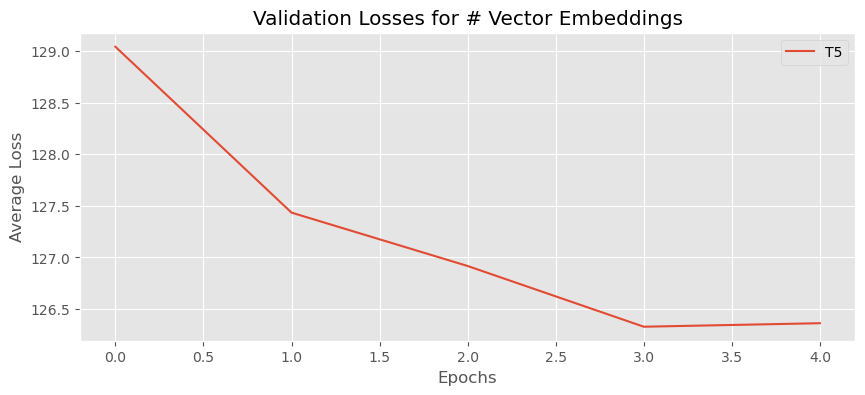

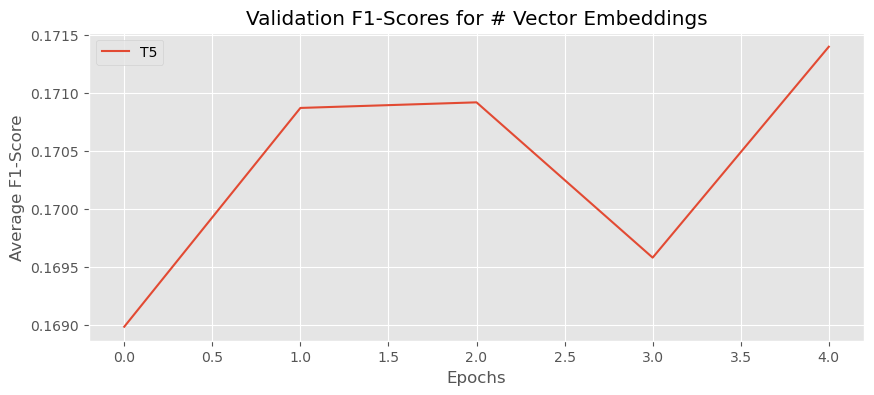

In [10]:
#protbert_model, protbert_losses, protbert_scores = train_model(embeddings_source="T5",model_type="convolutional")
plt.figure(figsize = (10, 4))
#plt.plot(ems2_losses["val"], label = "EMS2")
plt.plot(t5_losses["val"], label = "T5")
#plt.plot(protbert_losses["val"], label = "ProtBERT") 
plt.title("Validation Losses for # Vector Embeddings")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.show()

plt.figure(figsize = (10, 4))
#plt.plot(ems2_scores["val"], label = "EMS2")
plt.plot(t5_scores["val"], label = "T5")
#plt.plot(protbert_scores["val"], label = "ProtBERT")
plt.title("Validation F1-Scores for # Vector Embeddings")
plt.xlabel("Epochs")
plt.ylabel("Average F1-Score")
plt.legend()
plt.show()

#### This code defines a function called predict. This function enables the generation of predictions for the test dataset. Its function is as follows:

- The embeddings_source argument specifies the embedding source to use.
- test_dataset: Creates the test dataset using the ProteinSequenceDataset class.
- test_dataloader: Creates the test data loader using the DataLoader class.
- Selects the appropriate model depending on the embedding source (t5_model, protbert_model or ems2_model).
- Puts the model in evaluation mode (eval()).
- Loads the labels and takes the most common terms and assigns them to the labels_names variable.
- Loops to generate predictions:
- Loads the embedding tensor for each test sample into the instrument.
- Calculates forecasts using the model and applies the sigmoid activation function.
- Adds the predictions to the confs_ array and the ids (id) to the ids_ array.
- Adds the tag names (labels_names) to the go_terms_ array.
- Finally, it creates and prints a DataFrame (submission_df) containing the predictions.

#### This function generates predictions for the test dataset based on the embedding source and returns a DataFrame containing the predictions.


#### Bu kod, predict adında bir fonksiyon tanımlar. Bu fonksiyon, test veri kümesi için tahminlerin oluşturulmasını sağlar. İşlevi şu şekildedir:

- embeddings_source argümanı, kullanılacak gömme kaynağını belirler.
- test_dataset: ProteinSequenceDataset sınıfını kullanarak test veri kümesini oluşturur.
- test_dataloader: DataLoader sınıfını kullanarak test veri yükleyicisini oluşturur.
- Gömme kaynağına bağlı olarak uygun modeli seçer (t5_model, protbert_model veya ems2_model).
- Modeli değerlendirme moduna (eval()) geçirir.
- Etiketleri yükler ve en yaygın terimleri alarak labels_names değişkenine atar.
- Tahminleri oluşturmak için döngü oluşturur:
	- Her bir test örneği için gömme tensörünü cihaza yükler.
	- Modeli kullanarak tahminleri hesaplar ve sigmoid aktivasyon fonksiyonunu uygular.
	- Tahminleri confs_ dizisine ve kimlikleri (id) ids_ dizisine ekler.
	- Etiket adlarını (labels_names) go_terms_ dizisine ekler.
- Son olarak, tahminleri içeren bir DataFrame (submission_df) oluşturur ve yazdırır.

#### Bu fonksiyon, gömme kaynağına bağlı olarak test veri kümesi için tahminlerin oluşturulmasını sağlar ve tahminleri içeren bir DataFrame'i döndürür.

In [11]:
def predict(embeddings_source):
    
    test_dataset = ProteinSequenceDataset(datatype="test", embeddings_source = embeddings_source)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)
    
    if embeddings_source == "T5":
        model = t5_model
    if embeddings_source == "ProtBERT":
        model = protbert_model
    if embeddings_source == "EMS2":
        model = ems2_model
        
    model.eval()
    
    labels = pd.read_csv(config.train_labels_path, sep = "\t")
    top_terms = labels.groupby("term")["EntryID"].count().sort_values(ascending=False)
    labels_names = top_terms[:config.num_labels].index.values
    print("GENERATE PREDICTION FOR TEST SET...")

    ids_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=object)
    go_terms_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=object)
    confs_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=np.float32)

    for i, (embed, id) in tqdm(enumerate(test_dataloader)):
        embed = embed.to(config.device)
        confs_[i*config.num_labels:(i+1)*config.num_labels] = torch.nn.functional.sigmoid(model(embed)).squeeze().detach().cpu().numpy()
        ids_[i*config.num_labels:(i+1)*config.num_labels] = id[0]
        go_terms_[i*config.num_labels:(i+1)*config.num_labels] = labels_names

    submission_df = pd.DataFrame(data={"Id" : ids_, "GO term" : go_terms_, "Confidence" : confs_})
    print("PREDICTIONS DONE")
    return submission_df

In [12]:
submission_df = predict("T5")

GENERATE PREDICTION FOR TEST SET...


141865it [02:36, 908.63it/s] 


PREDICTIONS DONE


In [13]:
len(submission_df)

70932500

#### This code creates a DataFrame named submission_best_public2 and reads the dataset from /kaggle/input/cafa-5-053818-pred/submission(3).tsv. Its function is as follows:

- The pd.read_csv function reads the tsv format file and uploads the data to the submission_best_public2 DataFrame.
- The '/kaggle/input/cafa-5-053818-pred/submission(3).tsv' argument specifies the path of the file to be read.
- The sep='\t' argument specifies that the data is separated by a tab character.
The - header=None argument specifies that the file does not have a header line.
- names=['Id2', 'GO term2', 'Confidence2'] argument specifies the column names and with these names the columns of the DataFrame are created.

#### This code reads the specified tsv file and uploads it to the submission_best_public2 DataFrame.

#### Bu kod, submission_best_public2 adında bir DataFrame oluşturur ve veri kümesini /kaggle/input/cafa-5-053818-pred/submission (3).tsv dosyasından okur. İşlevi şu şekildedir:

- pd.read_csv fonksiyonu, tsv formatındaki dosyayı okur ve verileri submission_best_public2 DataFrame'ine yükler.
- '/kaggle/input/cafa-5-053818-pred/submission (3).tsv' argümanı, okunacak dosyanın yolunu belirtir.
- sep='\t' argümanı, verilerin sekme karakteriyle ayrıldığını belirtir.
- header=None argümanı, dosyanın başlık satırının olmadığını belirtir.
- names=['Id2', 'GO term2', 'Confidence2'] argümanı, sütun adlarını belirtir ve bu adlarla DataFrame'in sütunları oluşturulur.

#### Bu kod, belirtilen tsv dosyasını okur ve submission_best_public2 DataFrame'ine yükler.

In [14]:
submission_best_public2 = pd.read_csv('/kaggle/input/cafa-5-053818-pred/submission (3).tsv',
    sep='\t', header=None, names=['Id2', 'GO term2', 'Confidence2'])

#### This code combines the submission_best_public2 and submission_df datasets to create a new DataFrame named submissions. Its function is as follows:

- The merge function merges the submission_best_public2 and submission_df datasets.
- left_on=['Id2', 'GO term2'] argument specifies the columns in the left dataset in the join operation. The columns 'id2' and 'GO term2' are used.
- The argument right_on=['Id', 'GO term'] specifies the columns in the right dataset in the join operation. 'Id' and 'GO term' columns are used.
- The how='outer' argument specifies that the join will be done with the outer join method. This means that all rows in both datasets will be preserved.

#### This code combines submission_best_public2 and submission_df datasets in columns 'Id2' and 'GO term2' and records the result in submissions DataFrame. All rows in both datasets are preserved because the outer join method is used.


#### Bu kod, submission_best_public2 ve submission_df veri kümelerini birleştirerek submissions adında yeni bir DataFrame oluşturur. İşlevi şu şekildedir:

- merge fonksiyonu, submission_best_public2 ve submission_df veri kümelerini birleştirir.
- left_on=['Id2', 'GO term2'] argümanı, birleştirme işleminde sol veri kümesindeki sütunları belirtir. 'Id2' ve 'GO term2' sütunları kullanılır.
- right_on=['Id', 'GO term'] argümanı, birleştirme işleminde sağ veri kümesindeki sütunları belirtir. 'Id' ve 'GO term' sütunları kullanılır.
- how='outer' argümanı, birleştirme işleminin dış birleştirme (outer join) yöntemiyle yapılacağını belirtir. Bu, her iki veri kümesindeki tüm satırların korunacağı anlamına gelir.

#### Bu kod, submission_best_public2 ve submission_df veri kümelerini 'Id2' ve 'GO term2' sütunlarında birleştirir ve sonucu submissions DataFrame'ine kaydeder. Dış birleştirme yöntemi kullanıldığından, her iki veri kümesindeki tüm satırlar korunur.

In [15]:
submissions = submission_best_public2.merge(submission_df, left_on=['Id2', 'GO term2'], 
                                                  right_on=['Id', 'GO term'], how='outer')

#### This code will delete some columns in submissions DataFrame and add a new column. Its functions are as follows:

- drop(['Id', 'GO term'], axis=1, inplace=True): Deletes the 'Id' and 'GO term' columns. The axis=1 argument points to columns. The inplace=True argument ensures that changes are applied directly to the submissions DataFrame.
- submissions['confidence_combined'] = submissions.apply(lambda row: row['Confidence2'] if not np.isnan(row['Confidence2']) else row['Confidence'], axis=1): 'confidence_combined' Adds a new column named This column implements a function (lambda) for each row and uses the value in column 'Confidence2'. If the value in column 'Confidence2' is NaN, it will use the value in column 'Confidence'. It performs this operation for all rows with the axis=1 argument.

#### This code deletes the 'Id' and 'GO term' columns from the submissions DataFrame. It then adds a new column named confidence_combined and applies a specific action to that column for each row. It will use the value in column 'Confidence2', if the value is NaN it will use the value in column 'Confidence'.

#### Bu kod, submissions DataFrame'indeki bazı sütunların silinmesini ve yeni bir sütunun eklenmesini sağlar. İşlevleri şu şekildedir:

- drop(['Id', 'GO term'], axis=1, inplace=True): 'Id' ve 'GO term' sütunlarını siler. axis=1 argümanı, sütunları işaret eder. inplace=True argümanı, değişikliklerin doğrudan submissions DataFrame'ine uygulanmasını sağlar.
- submissions['confidence_combined'] = submissions.apply(lambda row: row['Confidence2'] if not np.isnan(row['Confidence2']) else row['Confidence'], axis=1): 'confidence_combined' adında yeni bir sütun ekler. Bu sütun, her bir satır için bir fonksiyonu (lambda) uygular ve 'Confidence2' sütunundaki değeri kullanır. Eğer 'Confidence2' sütunundaki değer NaN ise, 'Confidence' sütunundaki değeri kullanır. Bu işlemi tüm satırlar için axis=1 argümanıyla uygular.

#### Bu kod, submissions DataFrame'inden 'Id' ve 'GO term' sütunlarını siler. Ardından, confidence_combined adında yeni bir sütun ekler ve bu sütuna her bir satır için belirli bir işlemi uygular. 'Confidence2' sütunundaki değeri kullanırken, eğer değer NaN ise 'Confidence' sütunundaki değeri kullanır.

In [16]:
submissions.drop(['Id', 'GO term'], axis=1, inplace=True)
submissions['confidence_combined'] = submissions.apply(lambda row: row['Confidence2'] if not np.isnan(row['Confidence2']) else row['Confidence'], axis=1)

#### This code selects certain columns from submissions DataFrame and writes to a tsv file named 'submission.tsv'. Its function is as follows:

- submissions[['Id2', 'GO term2', 'confidence_combined']]: selects only 'Id2', 'GO term2' and 'confidence_combined' columns in submissions DataFrame.
- to_csv('submission.tsv', sep='\t', header=False, index=False): Performs writing the selected columns to 'submission.tsv' file in tsv format. The sep='\t' argument specifies that the columns are separated by a tab character. The header=False argument ensures that the header line is not written. The index=False argument ensures that row indexes are not written.


#### This code creates a tsv file named 'submission.tsv' using the columns selected from the submissions DataFrame. The file will have tab-separated columns and no header lines.

#### Bu kod, submissions DataFrame'inden belirli sütunları seçerek 'submission.tsv' adında bir tsv dosyasına yazma işlemi gerçekleştirir. İşlevi şu şekildedir:

- submissions[['Id2', 'GO term2', 'confidence_combined']]: submissions DataFrame'inde sadece 'Id2', 'GO term2' ve 'confidence_combined' sütunlarını seçer.
- to_csv('submission.tsv', sep='\t', header=False, index=False): Seçilen sütunları tsv formatında 'submission.tsv' dosyasına yazma işlemini gerçekleştirir. sep='\t' argümanı, sütunların sekme karakteriyle ayrıldığını belirtir. header=False argümanı, başlık satırının yazılmamasını sağlar. index=False argümanı, satır indekslerinin yazılmamasını sağlar.


#### Bu kod, submissions DataFrame'inden seçilen sütunları kullanarak 'submission.tsv' adında bir tsv dosyası oluşturur. Dosya, sekme karakteriyle ayrılan sütunlara sahip olacak ve başlık satırı içermeyecektir.

In [17]:
submissions[['Id2', 'GO term2', 'confidence_combined']].to_csv('submission.tsv', sep='\t', header=False, index=False)

In [18]:
print(submissions)

             Id2    GO term2  Confidence2  Confidence  confidence_combined
0         Q3UPK1  GO:0005634          1.0         NaN             1.000000
1         Q3UPK1  GO:0042393          1.0         NaN             1.000000
2         Q3UPK1  GO:0031491          1.0         NaN             1.000000
3         Q3UPK1  GO:0046872          1.0         NaN             1.000000
4         Q3UPK1  GO:0006357          1.0         NaN             1.000000
...          ...         ...          ...         ...                  ...
75254262     NaN         NaN          NaN    0.925861             0.925861
75254263     NaN         NaN          NaN    0.373169             0.373169
75254264     NaN         NaN          NaN    0.032172             0.032172
75254265     NaN         NaN          NaN    0.192296             0.192296
75254266     NaN         NaN          NaN    0.055106             0.055106

[75254267 rows x 5 columns]
